In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import shapiro,levene
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera

## Data Exploration

In [4]:
pd.set_option("display.max_columns", 100)
df=pd.read_csv("C:/Users/hp/Downloads/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
duplicates = df.duplicated()

# Display duplicate rows
duplicate_rows = df[duplicates]

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [6]:
df=df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [8]:
df.shape

(87396, 32)

In [9]:
df.describe(include='object').T

,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


## Checking and treating null values

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]

children        4
country       452
agent       12193
company     82137
dtype: int64

#### country

In [12]:
df.loc[df.country.isnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.924779
1    0.075221
Name: proportion, dtype: float64

In [13]:
df.loc[df.country.notnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.724064
1    0.275936
Name: proportion, dtype: float64

In [14]:
df.country.value_counts(normalize=True)

country
PRT    0.315755
GBR    0.119997
FRA    0.101640
ESP    0.083410
DEU    0.061959
         ...   
MMR    0.000012
BFA    0.000012
CYM    0.000012
MLI    0.000012
KHM    0.000012
Name: proportion, Length: 177, dtype: float64

In [15]:
pd.DataFrame(df.groupby("country")["is_canceled"].value_counts()).T

country     ABW  AGO      AIA ALB    AND    ARE     ARG     ARM    ASM ATA  \
is_canceled   0    1    0   0   0  1   1  0   1  0    0   1   0  1   0   0   
count         2  193  149   1   9  2   5  2  41  7  152  51   6  2   1   2   

country     ATF  AUS      AUT      AZE    BDI   BEL      BEN BFA BGD    BGR  \
is_canceled   0    0   1    0    1   1  0   0     0    1   1   0   1  0   0   
count         1  286  92  777  170   8  8   1  1670  411   3   1   7  3  59   

country        BHR    BHS BIH    BLR    BOL   BRA      BRB BWA CAF   CHE       \
is_canceled  1   1  0   0   0  1   0  1   0     0    1   0   0   0     0    1   
count        9   4  1   1   9  3  16  8   3  1268  727   2   1   5  1186  384   

country     CHL      CHN  ... SMR SRB    STP SUR SVK     SVN     SWE      SYC  \
is_canceled   0   1    0  ...   0   0  1   0   0   0   1   0  1    0    1   0   
count        49  16  424  ...   1  51  3   2   5  38  10  35  9  660  177   1   

country        SYR TGO THA     TJK    TMP    TUN      TUR     TWN     TZA     \
is_canceled  1   0   0   0   1   0  1   0  1   0   1    0   1   0   1   1  0   
count        1   3   2  24  16   1  1   2  1  19  18  116  97  30  13   3  2   

country     UGA UKR     UMI URY      USA      UZB    VEN    VGB VNM    ZAF  \
is_canceled   0   0   1   1   0  1     0    1   1  0   0  1   1   0  1   0   
count         2  42  20   1  21  9  1416  459   2  2  13  8   1   6  2  49   

country         ZMB    ZWE     
is_canceled   1   0  1   0  1  
count        29   1  1   2  2  

[1 rows x 292 columns]

In [16]:
top25 = df.country.value_counts(normalize = True)[0:25].index

In [17]:
def countries(x):
    if x in top25:
        return("Top25")
    else:
        return("Others")

In [18]:
df["Top25_country"]= df["country"].apply(countries)

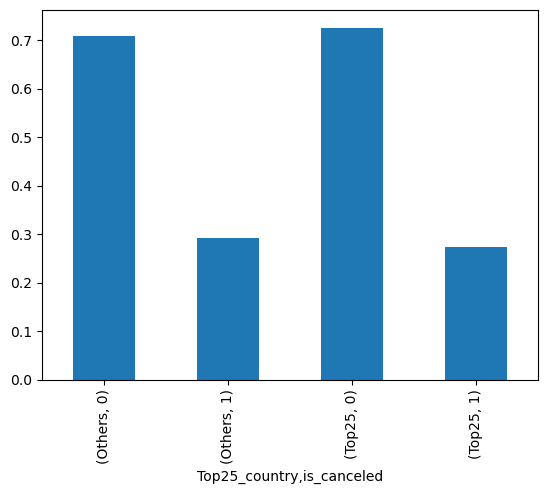

In [19]:
df.groupby("Top25_country")["is_canceled"].value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [20]:
tbl = pd.crosstab(df["Top25_country"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

0.009677068028541853

P-value: 0.0097

Significance Level (α): 0.05

Since the p-value (0.0097) is less than the significance level (0.05), we reject the null hypothesis. This suggests that there is a statistically significant association between the feature and the target variable in your contingency test.

In [21]:
df.Top25_country.value_counts(normalize=True)

Top25_country
Top25     0.947377
Others    0.052623
Name: proportion, dtype: float64

#### agents

In [22]:
df.loc[df.agent.isnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.872304
1    0.127696
Name: proportion, dtype: float64

In [23]:
df.loc[df.agent.notnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.701235
1    0.298765
Name: proportion, dtype: float64

In [24]:
df.agent.value_counts(normalize=True)

agent
9.0      0.382418
240.0    0.173238
14.0     0.044533
7.0      0.043881
250.0    0.036953
           ...   
497.0    0.000013
337.0    0.000013
510.0    0.000013
165.0    0.000013
449.0    0.000013
Name: proportion, Length: 333, dtype: float64

In [25]:
pd.DataFrame(df.groupby("agent")["is_canceled"].value_counts()).T

agent       1.0        2.0       3.0        4.0      5.0       6.0         \
is_canceled     0    1     0   1     0    1     1  0     0   1     0    1   
count         774  458   114  15   260  103    11  7   166  50   939  178   

agent       7.0        8.0         9.0          10.0      11.0      12.0       \
is_canceled     0    1     0    1      0      1     0   1     0   1     0   1   
count        2864  436   998  385  17235  11524   169  45   273  45   102  31   

agent       13.0      14.0       15.0      16.0      17.0      19.0       \
is_canceled     0   1     0    1     0   1     0   1     0   1     0   1   
count          55  22  2766  583   225  78   203  17    60  16   109  42   

agent       20.0      21.0      22.0      23.0     24.0  25.0  26.0       \
is_canceled     0   1     0   1     0   1     0  1     0     0     0   1   
count          87  30   152  47   307  38    14  2    13     2   163  24   

agent       27.0       ... 436.0    438.0 440.0     441.0 444.0 446.0 449.0  \
is_canceled     0   1  ...     0  1     0     1   0     0     0     0     0   
count         354  41  ...    44  3     2    12  11     4     1     1     1   

agent       450.0 451.0 453.0 454.0 455.0 459.0 461.0 464.0    467.0 468.0     \
is_canceled     0     0     0     0     0     0     0     0  1     0     0  1   
count           1     1     1     2    13     8     2    74  1    37    37  6   

agent       469.0 472.0 474.0 475.0 476.0 479.0 480.0 481.0    483.0 484.0     \
is_canceled     0     1     0     0     0     0     0     0  1     1     1  0   
count           2     1    14     2     2    31     1     4  1     1     1  1   

agent       492.0 493.0    495.0    497.0 502.0 508.0 509.0    510.0 526.0     \
is_canceled     1     0  1     0  1     0     0     0     0  1     0     0  1   
count           5    25  2     6  4     1    14     6     4  2     1     9  1   

agent       527.0 531.0     535.0  
is_canceled     0     1   0     0  
count          25    39  21     3  

[1 rows x 531 columns]

In [26]:
top25_agent = df.agent.value_counts(normalize = True).head(25)

In [27]:
def agents(x):
    if x in top25_agent:
        return("Top25")
    else:
        return("Others")

In [28]:
df["Top25_agent"]= df["agent"].apply(agents)

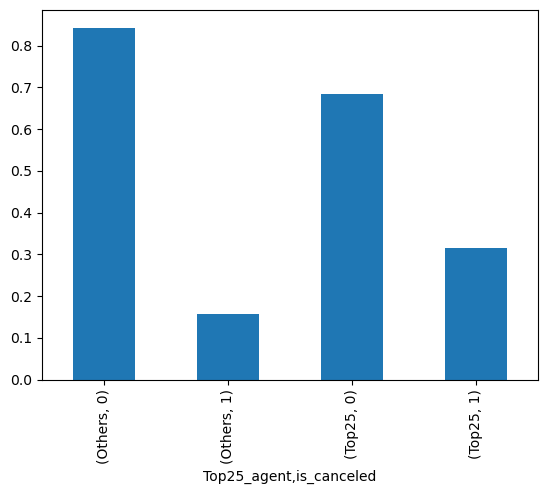

In [29]:
df.groupby("Top25_agent")["is_canceled"].value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [30]:
df.Top25_agent.value_counts(normalize=True)

Top25_agent
Top25     0.746213
Others    0.253787
Name: proportion, dtype: float64

In [31]:
tbl = pd.crosstab(df["Top25_agent"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

0.0

p-value: 0.0

Alpha (α): 0.05

Since 0.0 (p-value) is less than 0.05 (alpha), you reject the null hypothesis.

#### company

In [32]:
df.loc[df.company.isnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.714489
1    0.285511
Name: proportion, dtype: float64

In [33]:
df.loc[df.company.notnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.890854
1    0.109146
Name: proportion, dtype: float64

In [34]:
df.company.value_counts(normalize=True)

company
40.0     0.161818
223.0    0.095646
45.0     0.045256
153.0    0.039171
154.0    0.025290
           ...   
10.0     0.000190
419.0    0.000190
415.0    0.000190
425.0    0.000190
534.0    0.000190
Name: proportion, Length: 352, dtype: float64

In [35]:
pd.DataFrame(df.groupby("company")["is_canceled"].value_counts()).T

company     6.0   8.0   9.0      10.0  11.0  12.0  14.0     16.0  18.0  20.0   \
is_canceled     0     0     0  1     0     0     0     0  1     0     0     0   
count           1     1    33  3     1     1    13     8  1     5     1    27   

company        22.0  28.0  29.0  31.0     32.0  34.0     35.0  37.0  38.0   \
is_canceled  1     0     0     0     0  1     0     0  1     0     1     0   
count        4     5     5     1    10  3     1     7  1     1     1    11   

company         39.0     40.0      42.0  43.0     45.0      46.0     47.0      \
is_canceled   1     0  1     0   1     0     0  1     0   1     0  1     0  1   
count        11     7  1   784  67     5    11  2   212  26    23  1    58  4   

company     48.0  49.0  51.0      52.0  53.0     54.0  59.0     61.0  62.0   \
is_canceled     1     0     0   1     0     0  1     0     0  1     0     0   
count           2     5    54  26     1     6  2     1     6  1     2    41   

company      ... 470.0 477.0    478.0    479.0 481.0 482.0 483.0 484.0 485.0  \
is_canceled  ...     1     0  1     0  1     0     0     0     0     0     0   
count        ...     1    13  1     1  1     1     1     2     1     2    14   

company     486.0    487.0 489.0 490.0 491.0 492.0 494.0 496.0 497.0 498.0     \
is_canceled     0  1     0     0     0     0     0     0     0     0     0  1   
count           1  1     1     1     5     2     2     4     1     1    29  5   

company     499.0 501.0 504.0    506.0 507.0 511.0 512.0 513.0 514.0 515.0     \
is_canceled     0     0     0  1     0     0     0     0     1     0     0  1   
count           1     1     7  2     1     8     5     3     2     2     5  1   

company     516.0 518.0 520.0 521.0    523.0 525.0 528.0 530.0    531.0 534.0  \
is_canceled     0     0     0     0  1     0     0     0     0  1     1     0   
count           1     2     1     4  1     8    11     2     3  1     1     1   

company     539.0 541.0 543.0  
is_canceled     0     0     1  
count           2     1     2  

[1 rows x 480 columns]

In [36]:
top25_company = df.company.value_counts(normalize = True).head(25)

In [37]:
def companies(x):
    if x in top25_agent:
        return("Top25")
    else:
        return("Others")

In [38]:
df["Top25_company"]= df["company"].apply(companies)

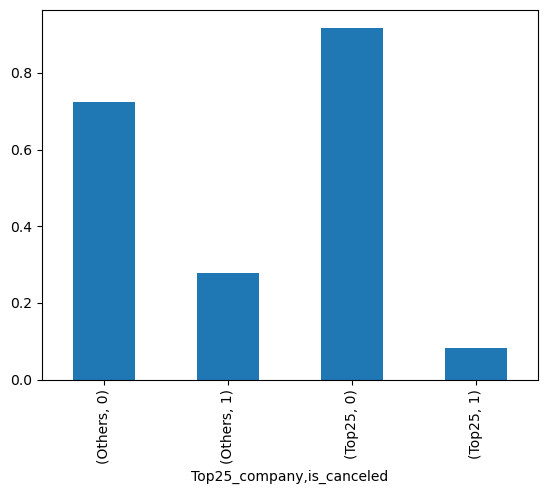

In [39]:
df.groupby("Top25_company")["is_canceled"].value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [40]:
df.Top25_company.value_counts(normalize=True)

Top25_company
Others    0.989199
Top25     0.010801
Name: proportion, dtype: float64

In [41]:
tbl = pd.crosstab(df["Top25_company"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

1.3481234008300024e-40

A p-value of 1.3481234008300024e-40 for a chi-squared contingency test is extremely small. Given that it's much smaller than the typical alpha level of 0.05, you can conclude that:

The feature is statistically significant with respect to the target variable.


#### children

In [42]:
df = df.dropna(subset=['children']).reset_index(drop=True)

In [43]:
df=df.drop(['country','agent','company'], axis=1)

## Uni-Variate Analysis

Univariate analysis is a statistical technique used to analyze and summarize a single variable's distribution, central tendency, and dispersion. It is a foundational component of exploratory data analysis (EDA)

The primary aim of univariate analysis is to characterize the data distribution and understand its key features. This includes:

Distribution: Examining how values of the variable are spread across different levels or intervals.
Central Tendency: Identifying the central point or typical value of the variable, commonly measured by mean, median, or mode.
Dispersion: Assessing the spread or variability of the variable, using measures such as range, variance, or standard deviation.





Numerical Variables
For numerical variables (int64 and float64), we'll look at basic statistics (mean, median, standard deviation, etc.) and visualize distributions using histograms and box plots.

1. adr
2.  lead_time  --------> list all numerical columns


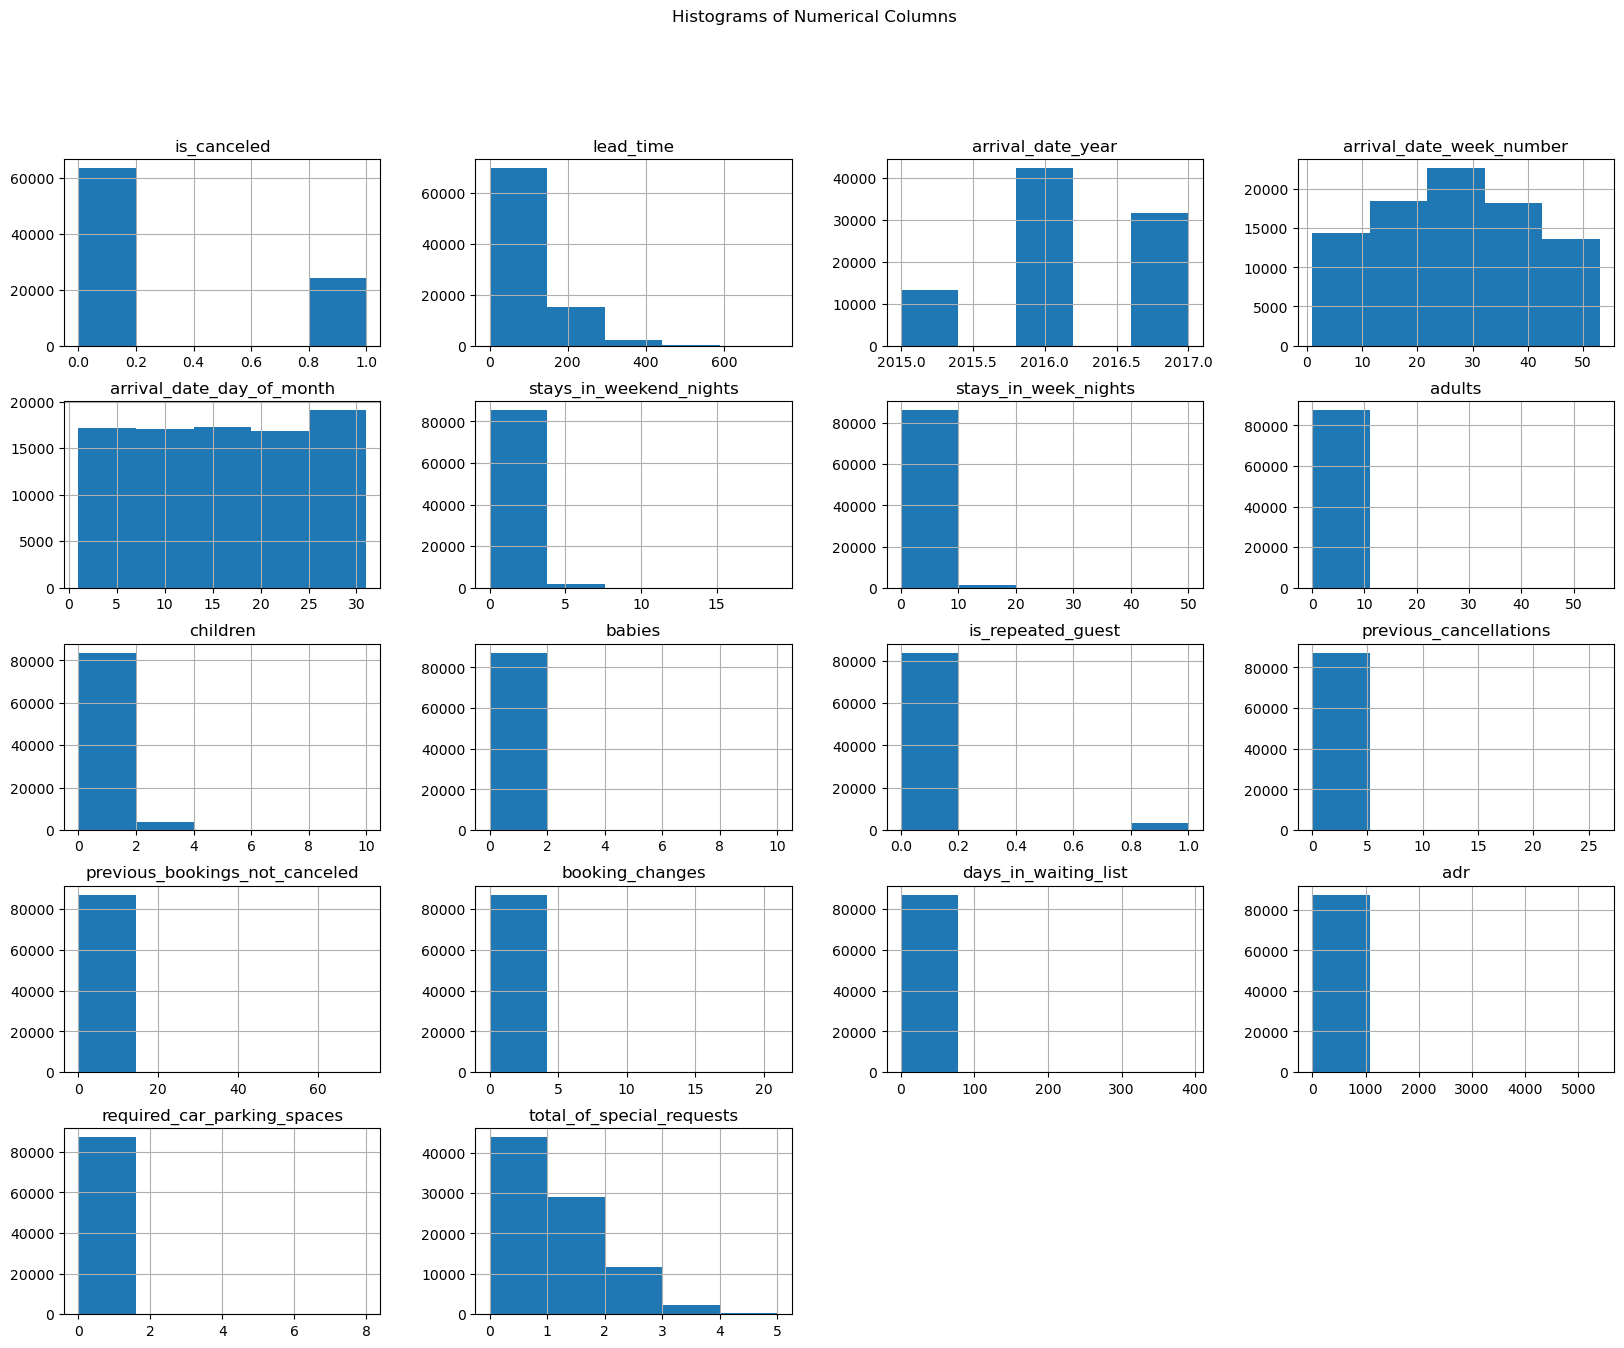

In [44]:
num_cols=df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist( bins=5,figsize=(20, 15), layout=(5, 4))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [45]:
## Lets try lineplot for variables which have only 1 bar

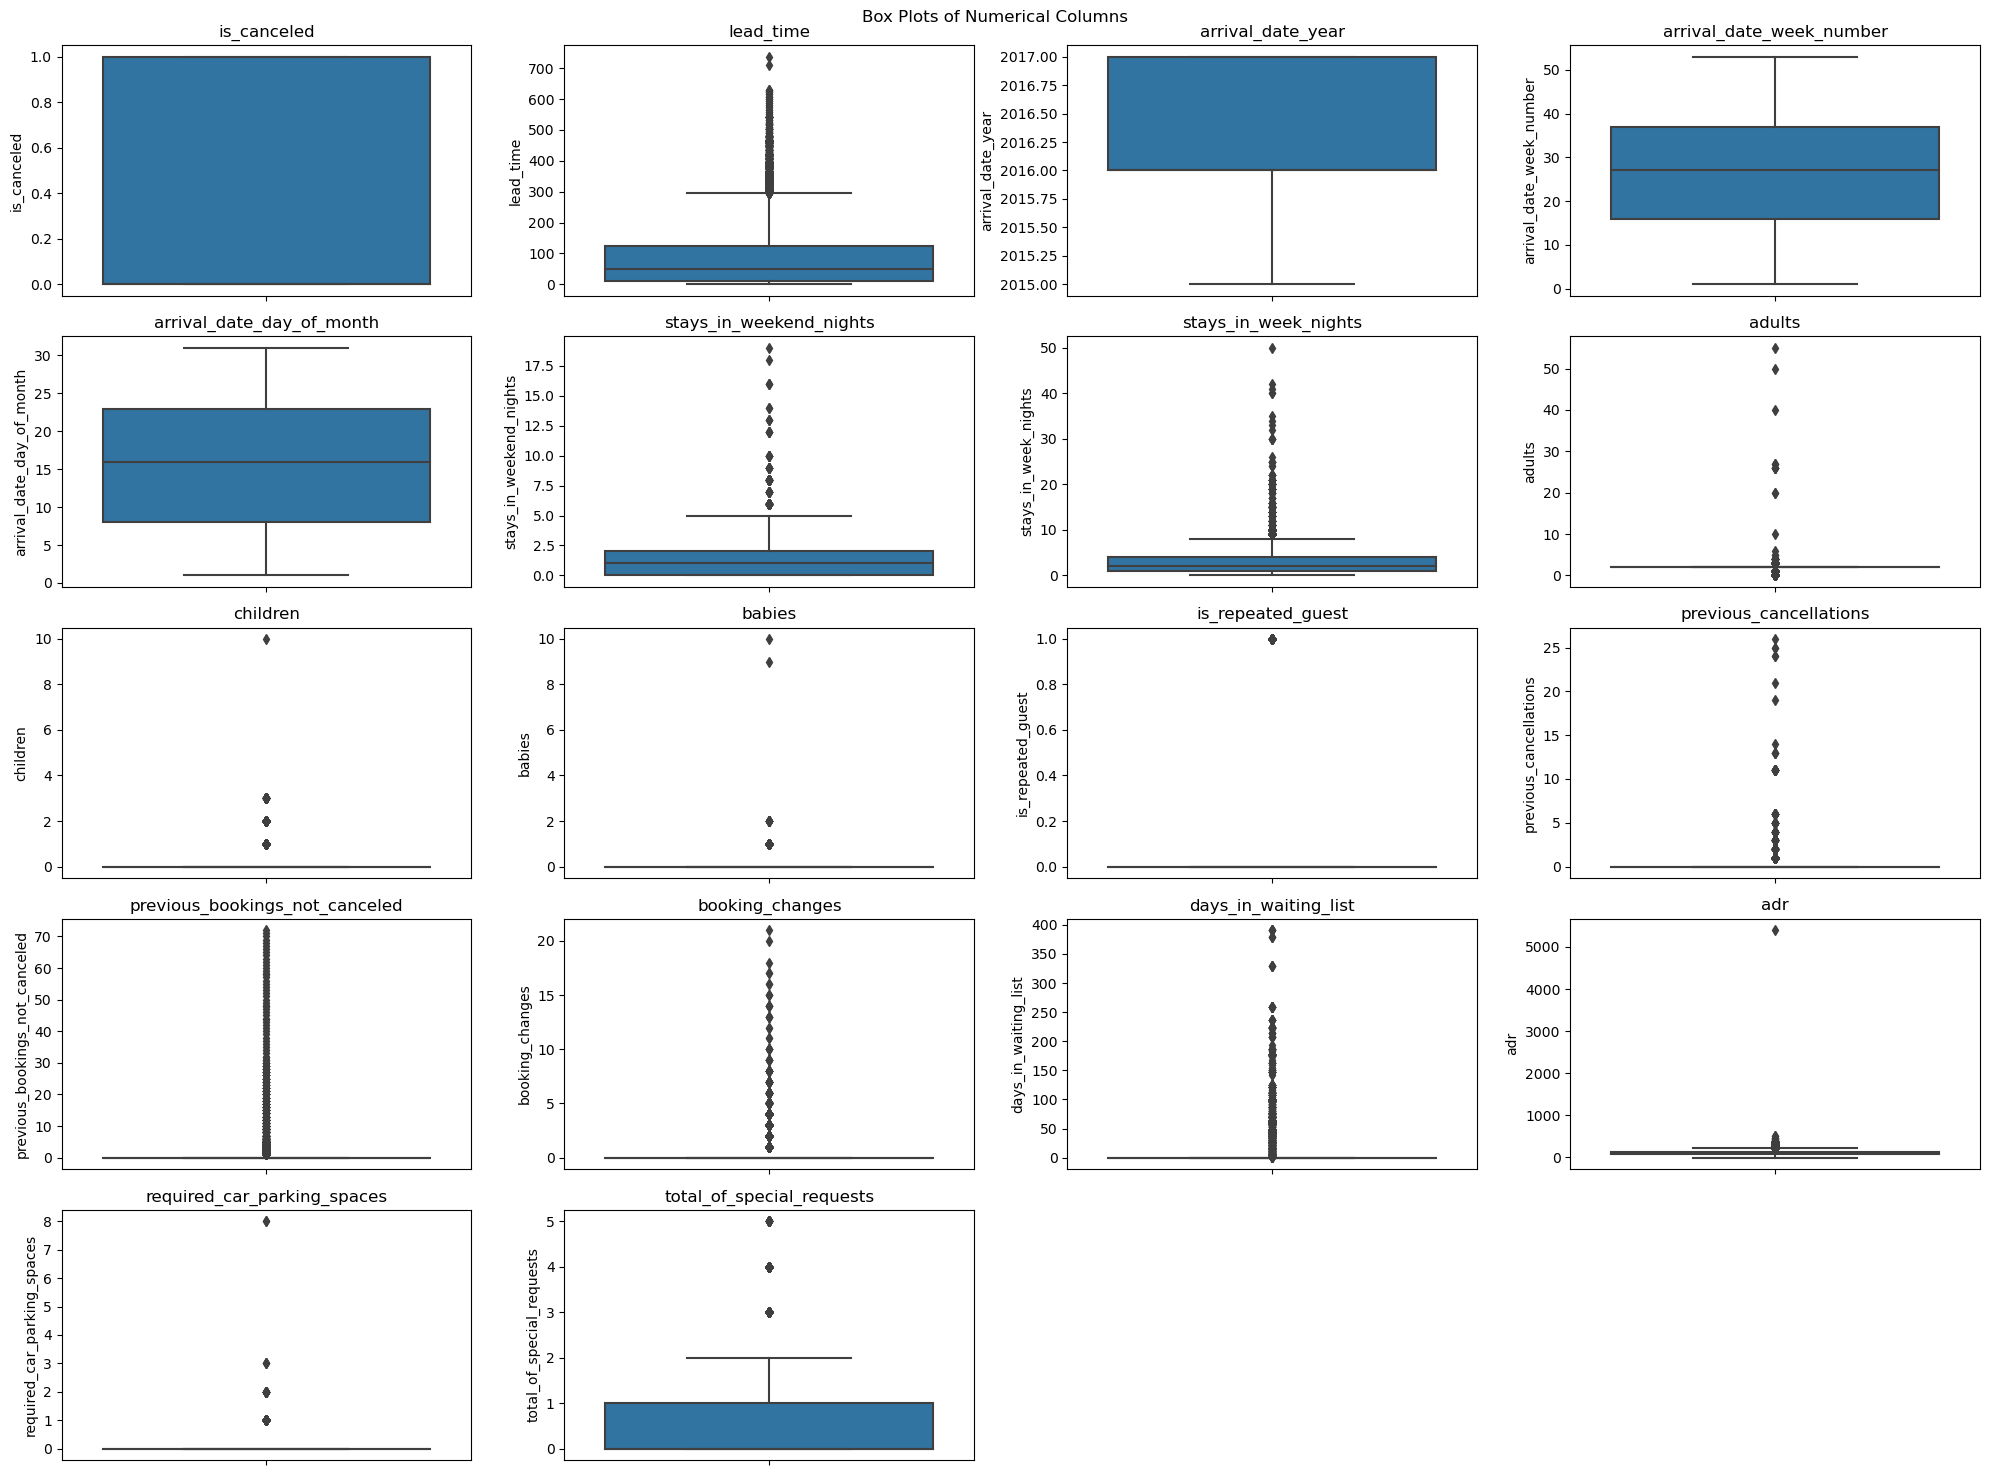

In [46]:
# Box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle('Box Plots of Numerical Columns')
plt.tight_layout()
plt.show()

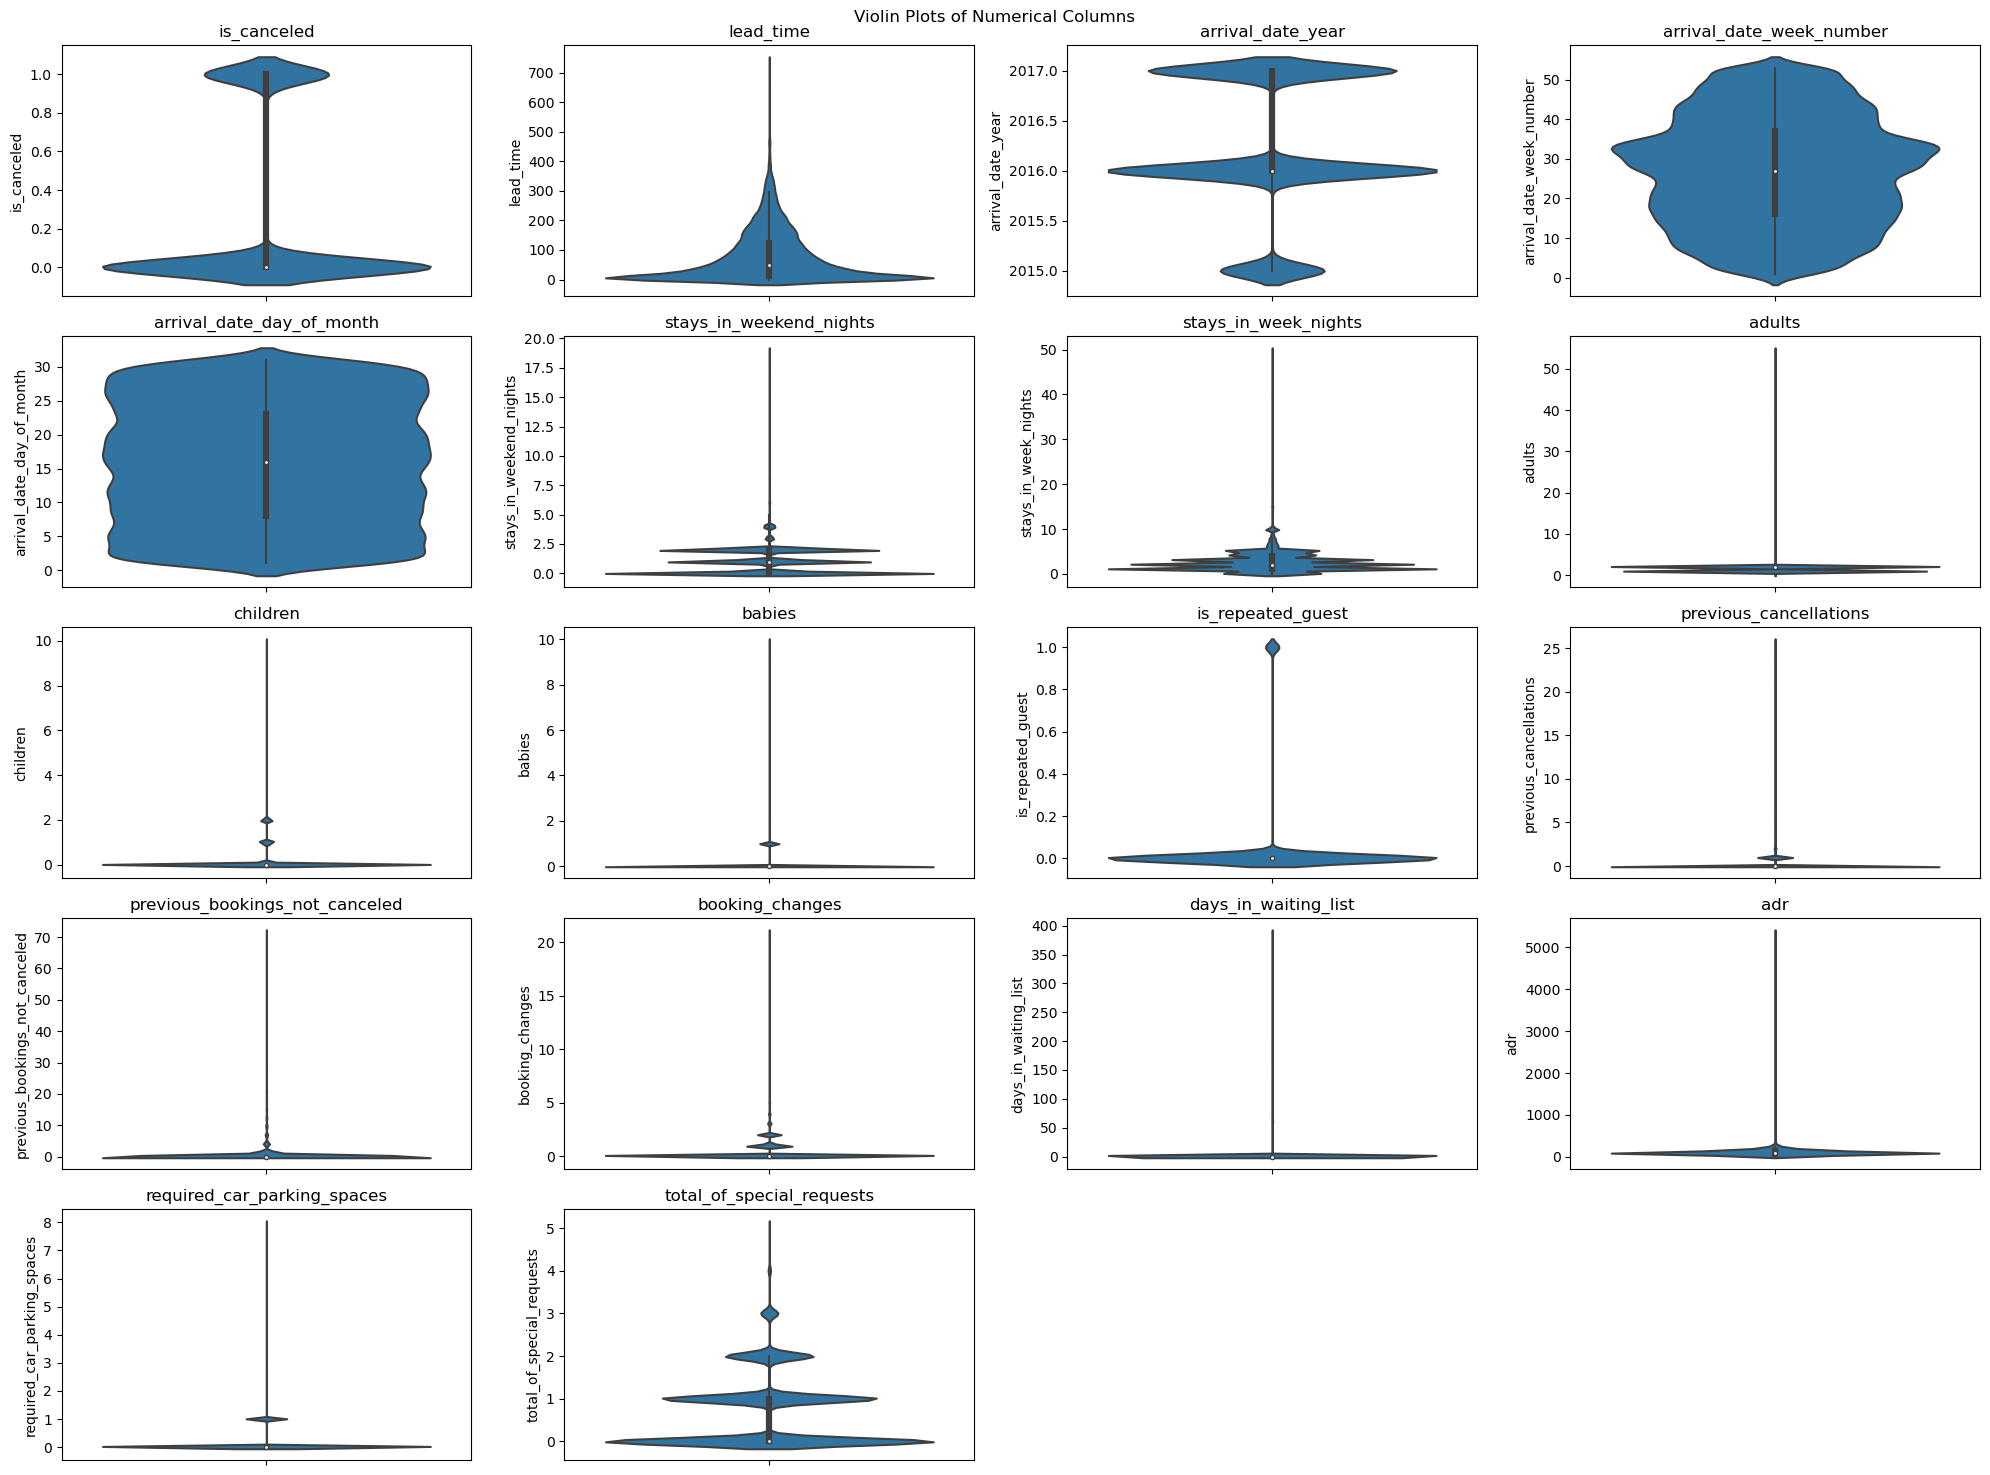

In [47]:
# Create violin plots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.suptitle('Violin Plots of Numerical Columns')
plt.tight_layout()
plt.show()

Skewness:

Many features exhibit right skewness (e.g., lead_time, stays_in_weekend_nights, adults, children, babies, previous_bookings_not_canceled, booking_changes, days_in_waiting_list, adr). This indicates that most values are concentrated on the lower end, with a few outliers extending towards higher values.

Outliers:

Several features have outliers, as evident in both histograms and boxplots (e.g., lead_time, stays_in_weekend_nights, adults, children, babies, required_car_parking_spaces). These outliers might require further investigation to understand their impact on the data.

Data Concentration:

Some features show a clear concentration of data in specific ranges. For instance, arrival_date_day_of_month has a peak around mid-month.


Insights by Feature

Lead Time: Most bookings have a short lead time, but there's a significant number of long lead time bookings (outliers).

Arrival Date: The data spans multiple years with a concentration around 2016. The distribution of bookings across weeks is relatively uniform.

Guest Information: Most bookings are for single or double occupancy (adults). Children and babies are less frequent.

Booking Behavior: A majority of guests have no previous cancellations or booking changes.

Booking Length and Cost: Shorter stays are more common (stays_in_week_nights, stays_in_weekend_nights). The average daily rate (adr) varies widely, with a concentration at lower rates.

Additional Information: Most bookings are not canceled (is_canceled). Repeat guests (is_repeated_guest) constitute a significant portion. Car parking spaces and special requests are not frequently required.

In [48]:
df_num = df.select_dtypes(exclude='object')
for col in df_num:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print('xxxxxxxxxxxxxxxxxxxxxxxx')


Value counts for is_canceled:
is_canceled
0    63371
1    24021
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxx

Value counts for lead_time:
lead_time
0      5978
1      3214
2      1926
3      1704
4      1570
       ... 
410       1
411       1
371       1
532       1
463       1
Name: count, Length: 479, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxx

Value counts for arrival_date_year:
arrival_date_year
2016    42391
2017    31692
2015    13309
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxx

Value counts for arrival_date_week_number:
arrival_date_week_number
33    2792
34    2491
32    2446
28    2344
30    2335
31    2287
29    2197
27    2166
35    2105
18    2089
21    2044
15    1989
17    1878
23    1872
20    1843
13    1818
19    1813
25    1786
22    1753
24    1746
26    1739
16    1737
14    1693
41    1663
11    1658
38    1635
7     1630
10    1630
36    1626
43    1605
39    1590
9     1579
12    1573
44    1550
8     1525
37    1474
42    1445
40    1427
53    1423
45 

In [49]:
df_num.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

2. Categorical Variables
   
For categorical variables (object), we'll look at the frequency distribution of each category using bar plots.

Categorical Columns:

1. hotel
2. arrival_date_month --------> List all columns


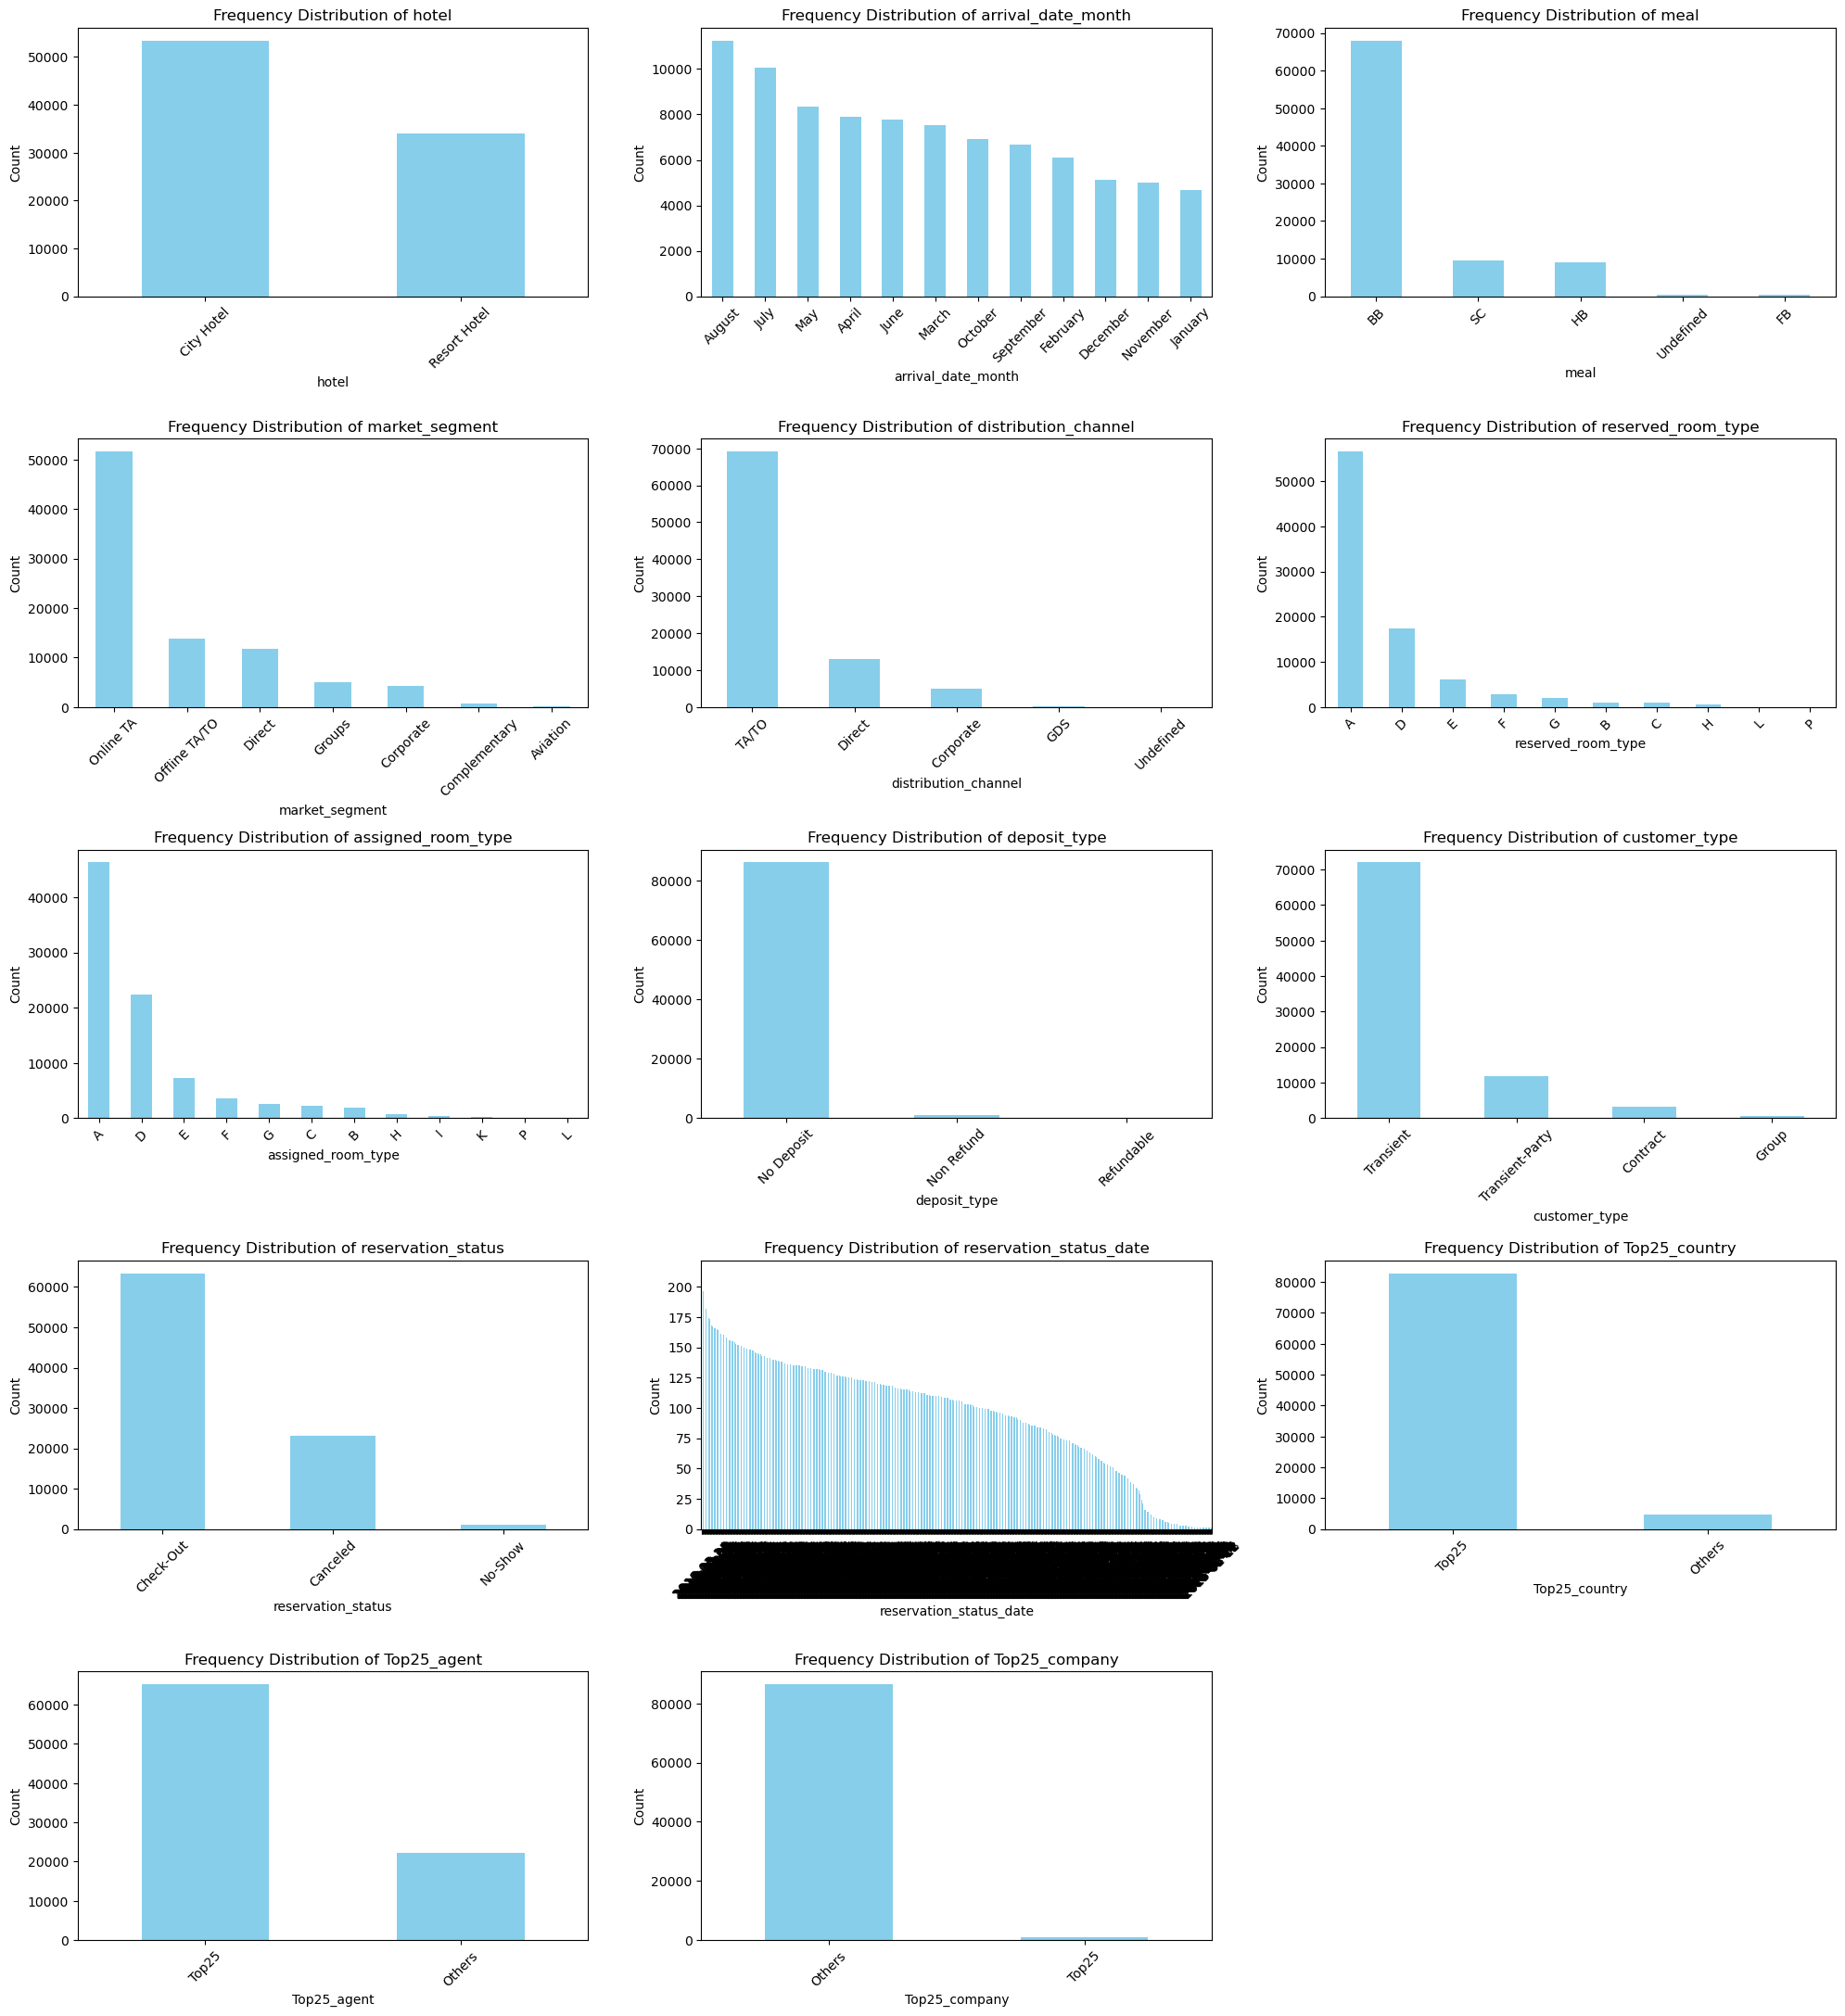

In [50]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols):
    plt.subplot(7,3,i+1 )
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

1. Hotel Popularity: The graph "Frequency Distribution of Hotel" shows that "City Hotel" is the most booked hotel type, followed by "Resort Hotel."

2. Seasonal Trends: The "Frequency Distribution of Arrival Date Month" indicates that the hotel experiences peak bookings in July and August, with a decline in the winter months.

3. Market Segmentation: The "Frequency Distribution of Market Segment" reveals that the majority of bookings come from the "Online TA" segment, followed by "Direct."

4. Distribution Channels: The "Frequency Distribution of Distribution Channel" highlights that "TA/TO" is the most common distribution channel, followed by "Direct."

5. Room Type Preferences: The "Frequency Distribution of Reserved Room Type" shows that "Single with extra bed" is the most popular room type, followed by "Double or Twin."

6. Customer Demographics: The "Frequency Distribution of Customer Type" suggests that the hotel caters primarily to leisure travelers ("Transient").

7. Geographic Focus: The "Frequency Distribution of Top25 Country" indicates that the hotel receives a significant number of bookings from "PRT" (Portugal), followed by "GBR" (Great Britain).

8. Reservation Patterns: The "Frequency Distribution of Reservation Status" reveals that the majority of reservations are confirmed ("Confirmed"), with a smaller portion being canceled ("Canceled").


There seems to be a positive correlation between 'room type' and 'assigned room type', suggesting that most guests are accommodated in their preferred room type.
The distribution of deposit types is skewed towards "No Deposit," indicating that a significant portion of guests opt for this payment option.
The hotel appears to have a global reach, with bookings originating from various countries.

3. Datetime Variable
   
For the datetime variable (reservation_status_date), we can look at the distribution over time, focusing on trends and patterns.

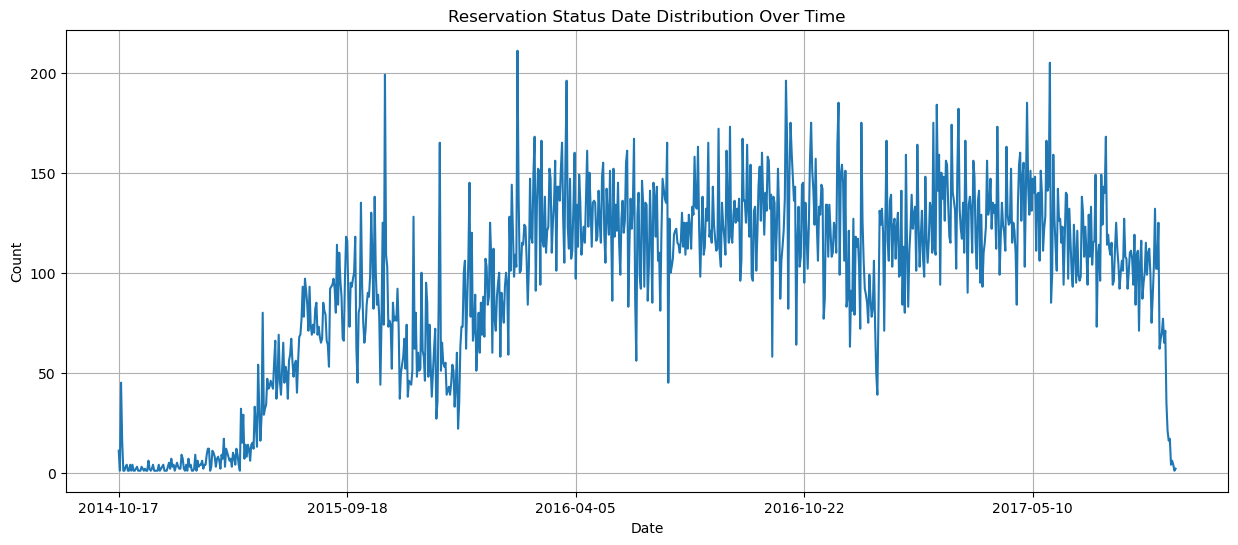

In [51]:
plt.figure(figsize=(15, 6))
df['reservation_status_date'].value_counts().sort_index().plot()
plt.title('Reservation Status Date Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Bi-Variate Analysis

Bivariate analysis is a statistical technique used to explore the relationship between two variables. In the context of predicting a binary target variable like is_canceled, which indicates whether a booking has been canceled (1) or not (0), bivariate analysis helps to assess how the target variable is influenced by or associated with another variable.

In [52]:
def create_stacked_bar_plots(df, cat_cols):
  
    for col in cat_cols:
        fig, ax = plt.subplots(figsize=(12, 8))  # Create a clean figure and axes

        # Calculate proportions for clearer visualization
        crosstab = pd.crosstab(df[col], df['is_canceled'], normalize='index')

        # Create the stacked bar plot with improved aesthetics
        crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')  # Use a visually appealing colormap

        ax.set_title(f'Stacked Bar Plot of {col} by is_canceled', fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Proportion of Cancellations', fontsize=12)
        ax.legend(title='is_canceled', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Improve legend placement
        ax.tick_params(bottom=False, labelsize=10)  # Remove unnecessary bottom ticks, adjust label size
        ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray', which='both')  # Add subtle grid lines

        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.tight_layout()  # Adjust spacing for better layout
        plt.show()

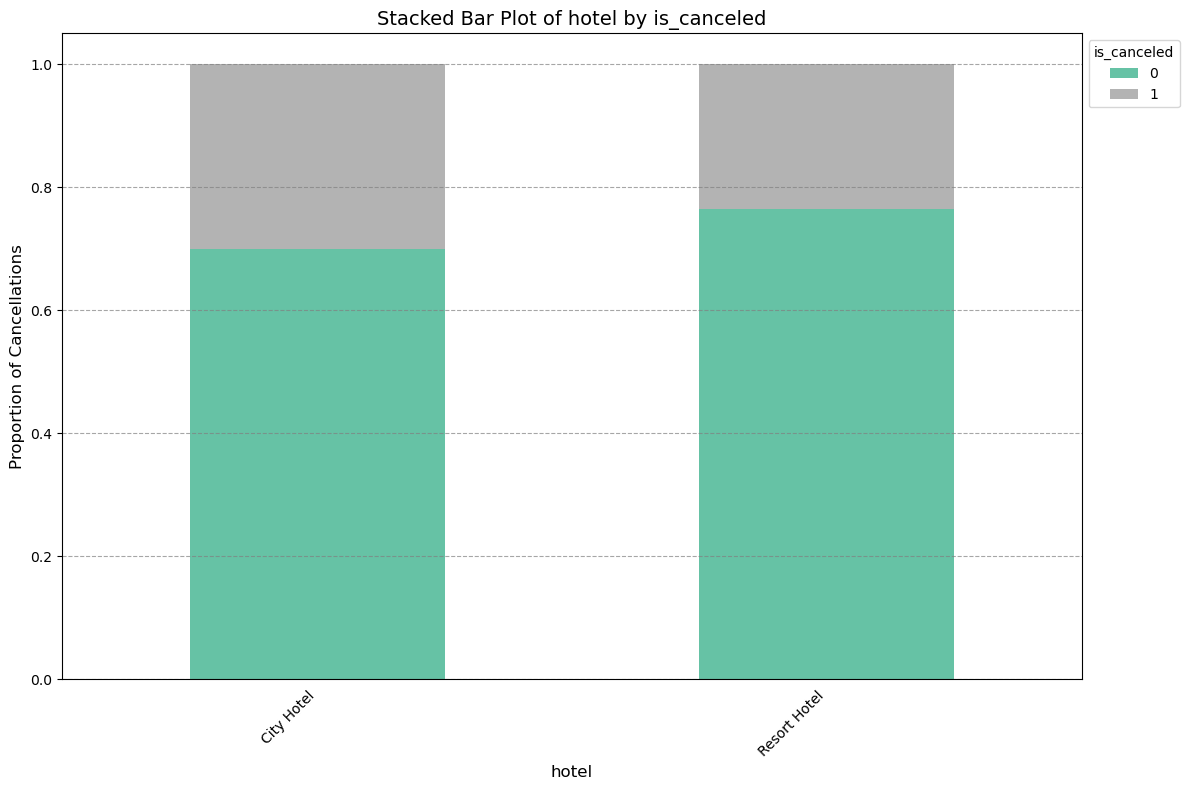

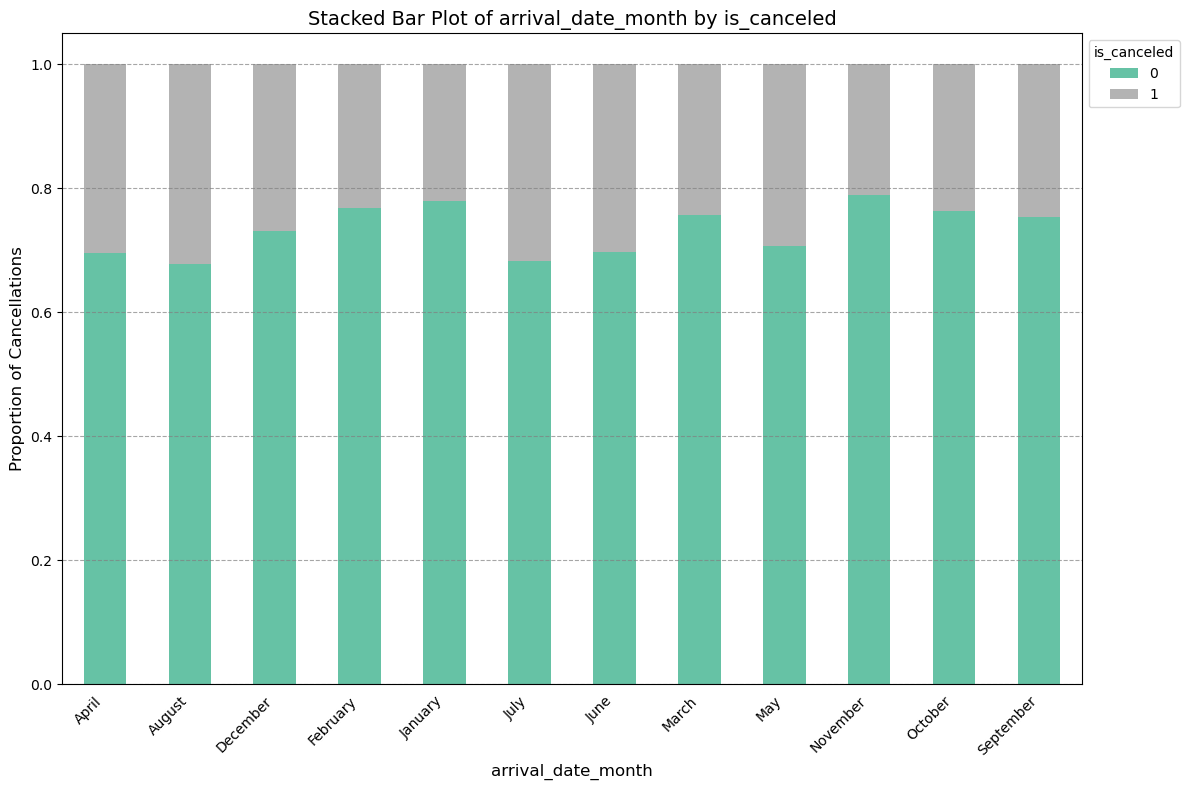

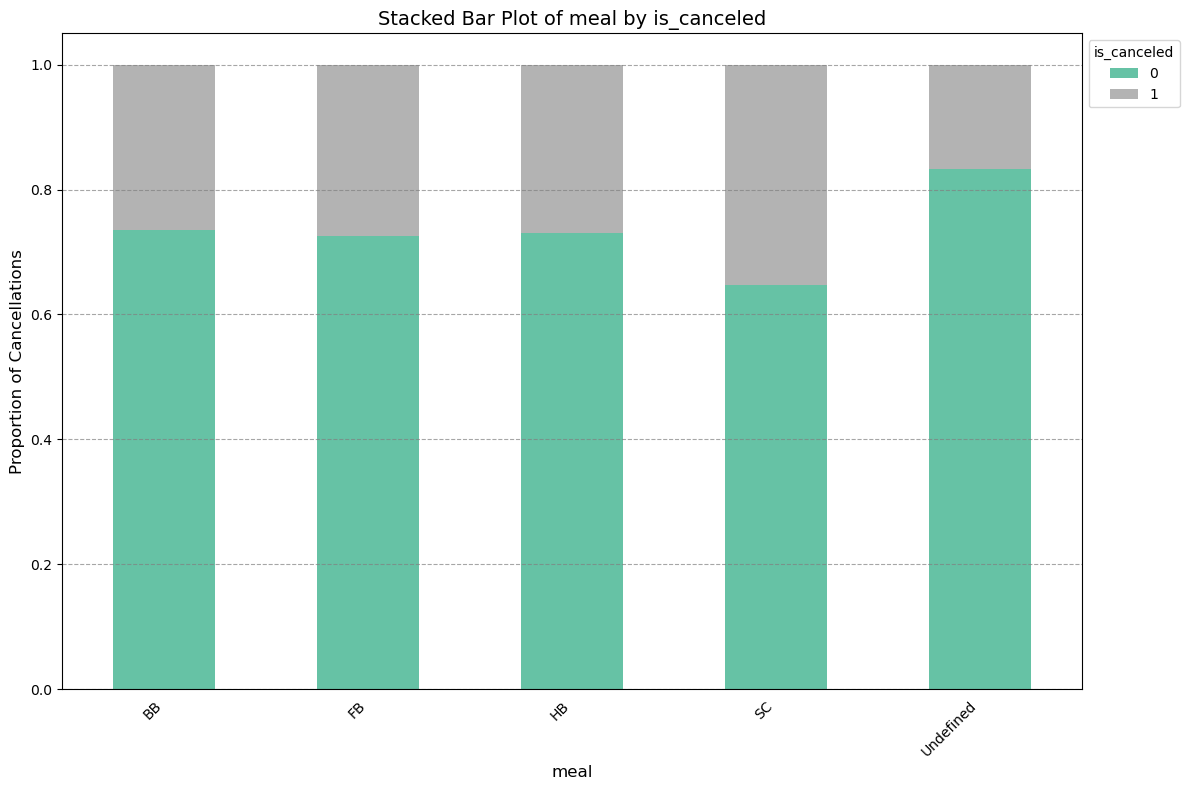

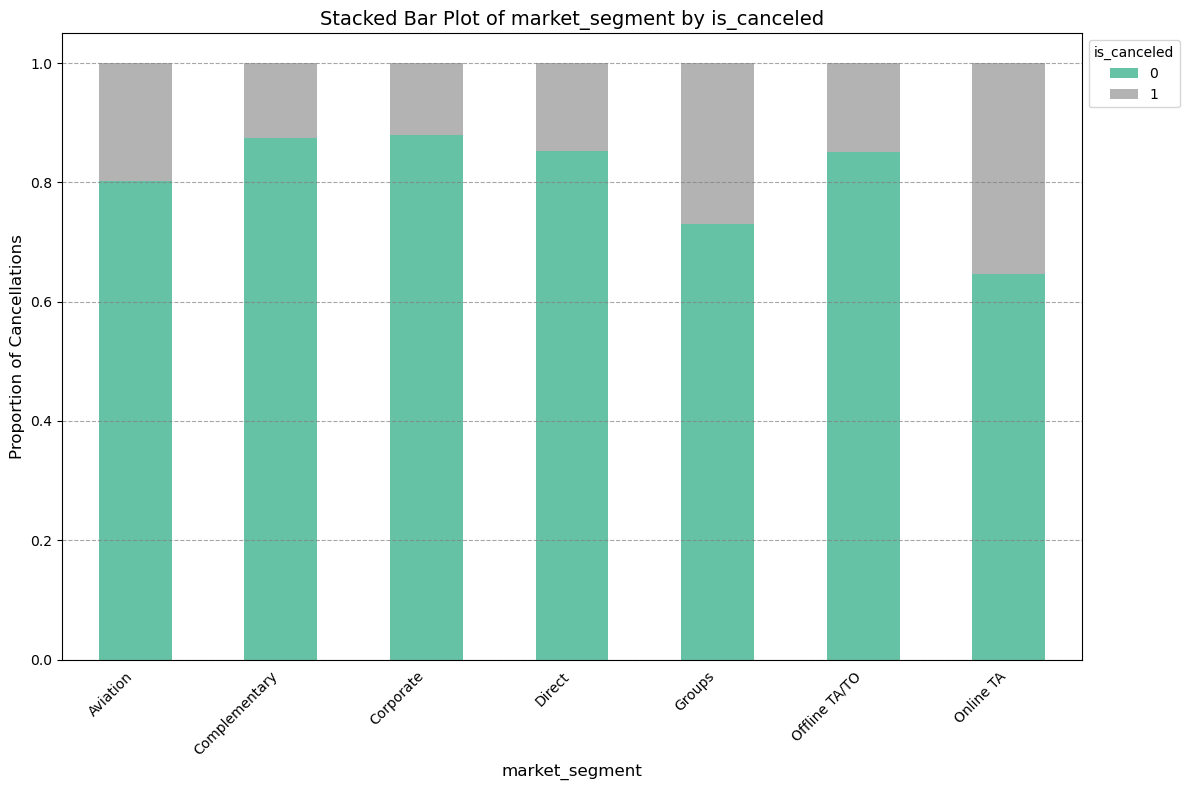

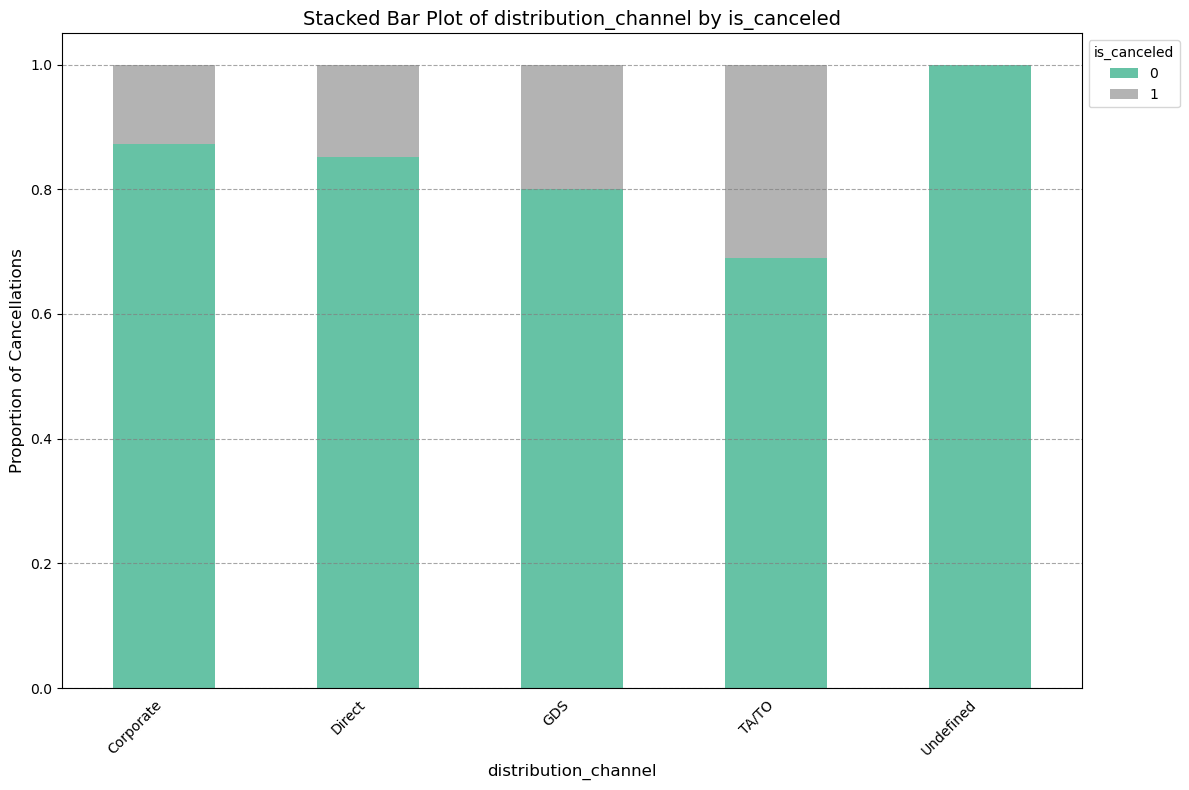

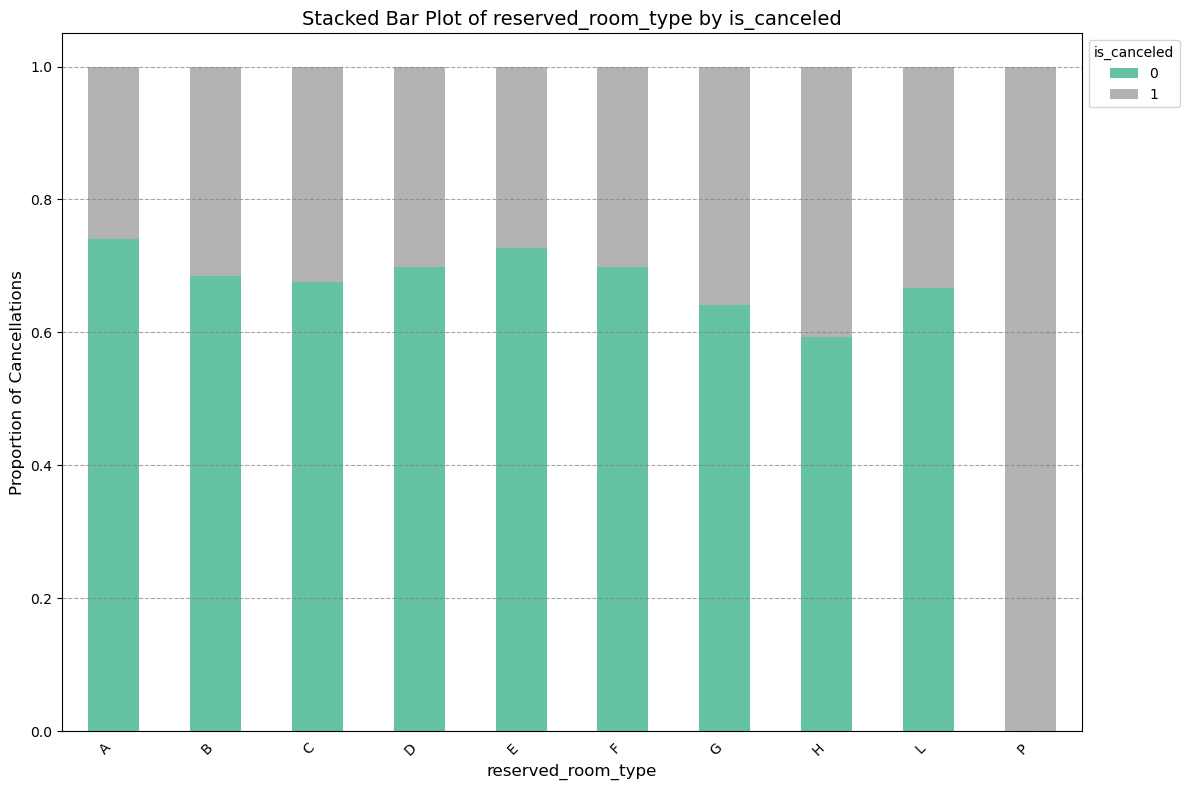

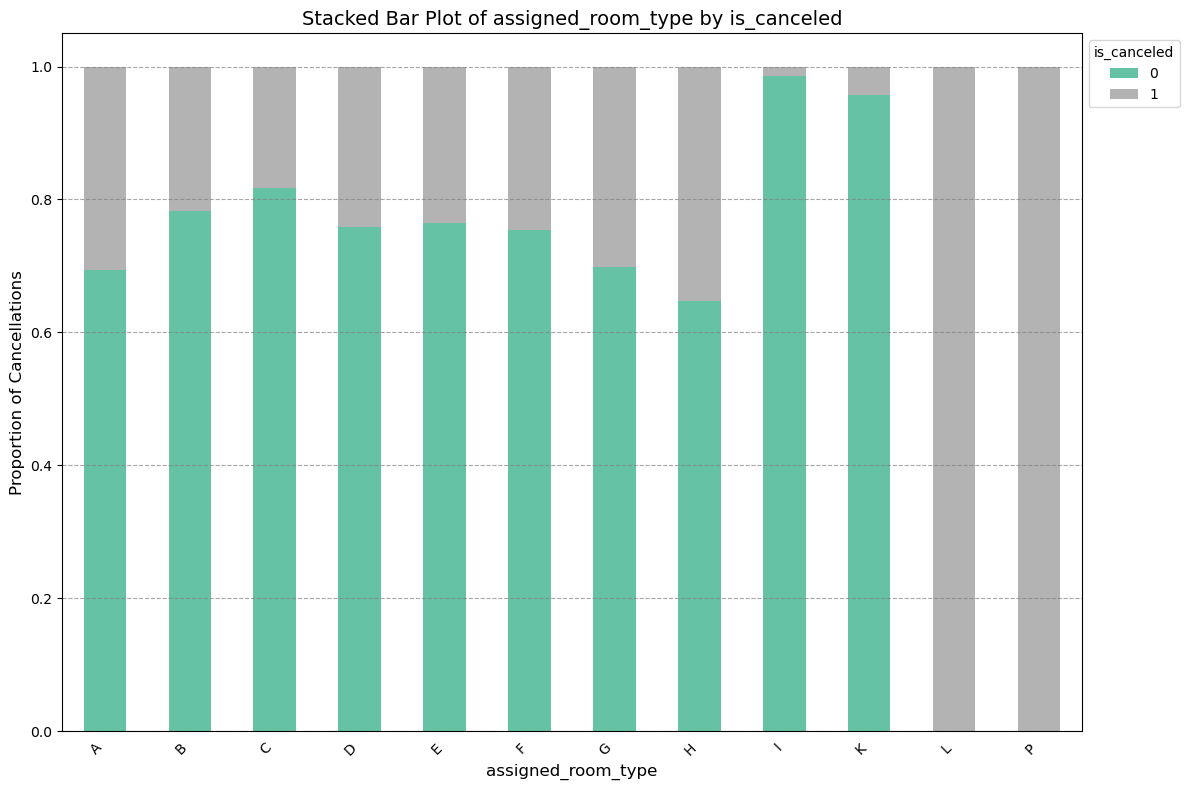

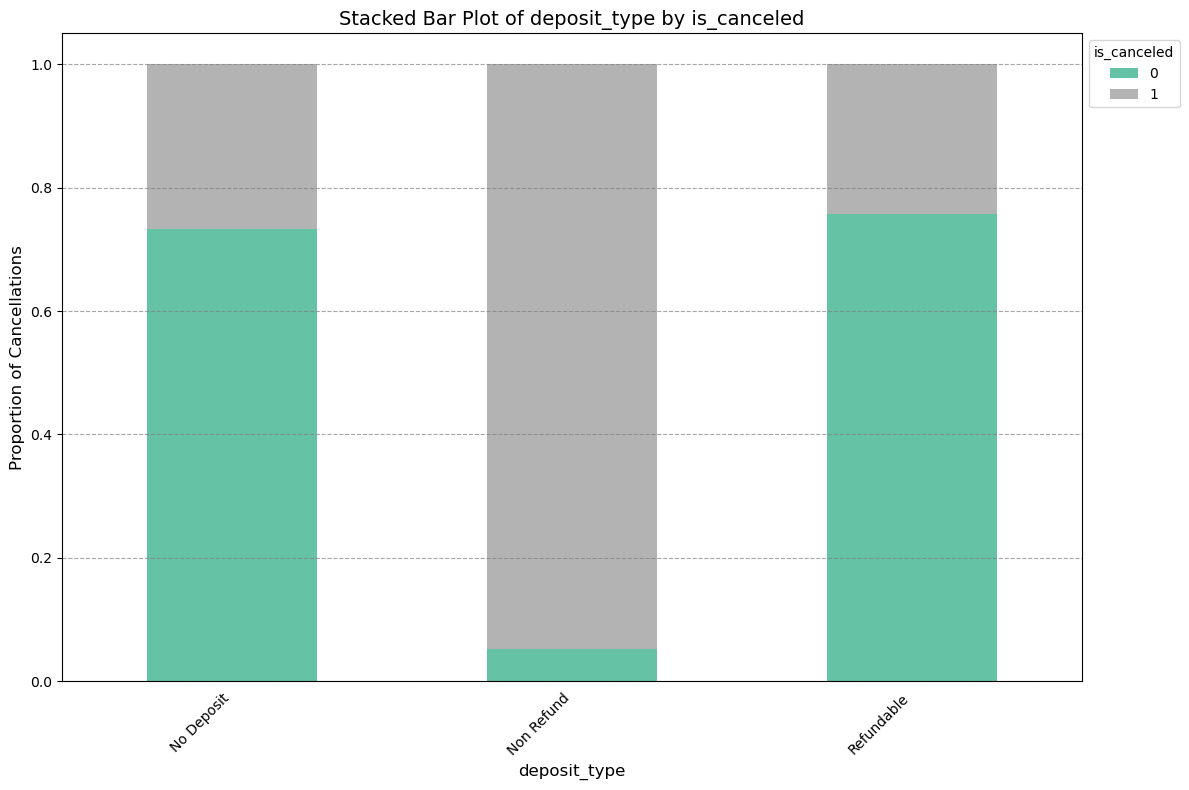

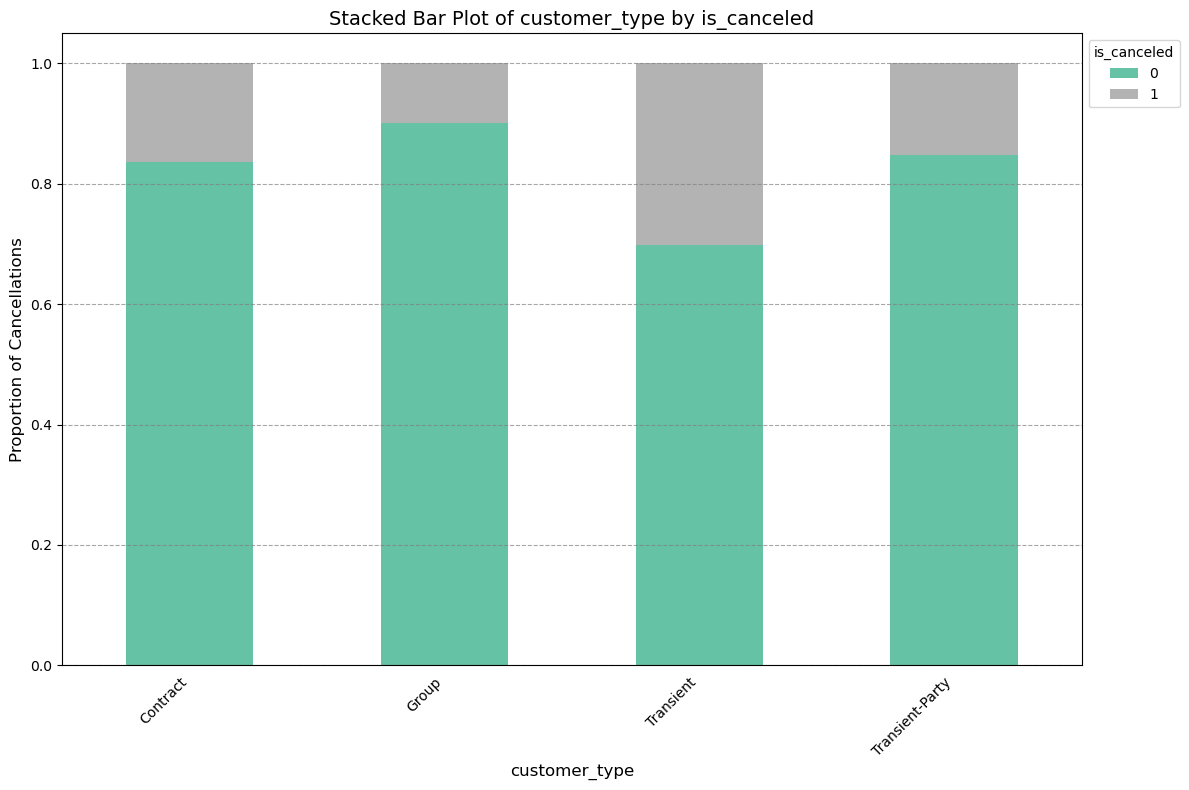

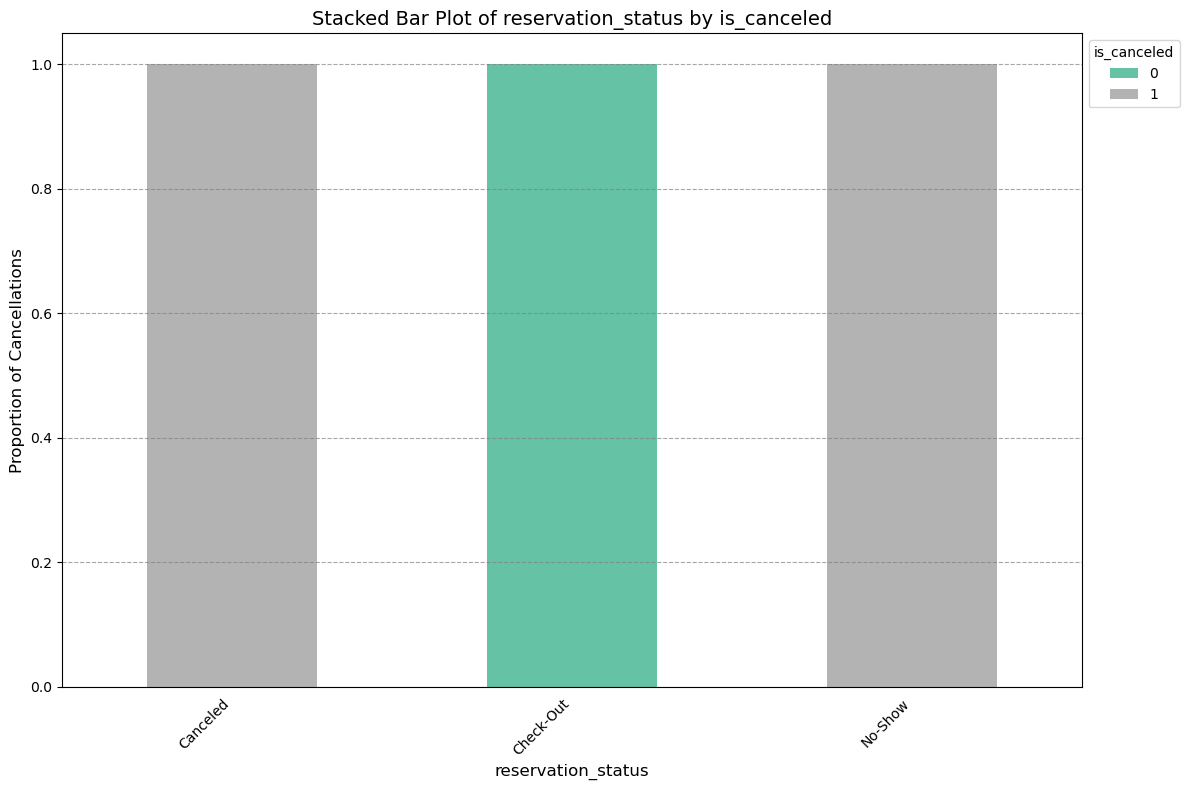

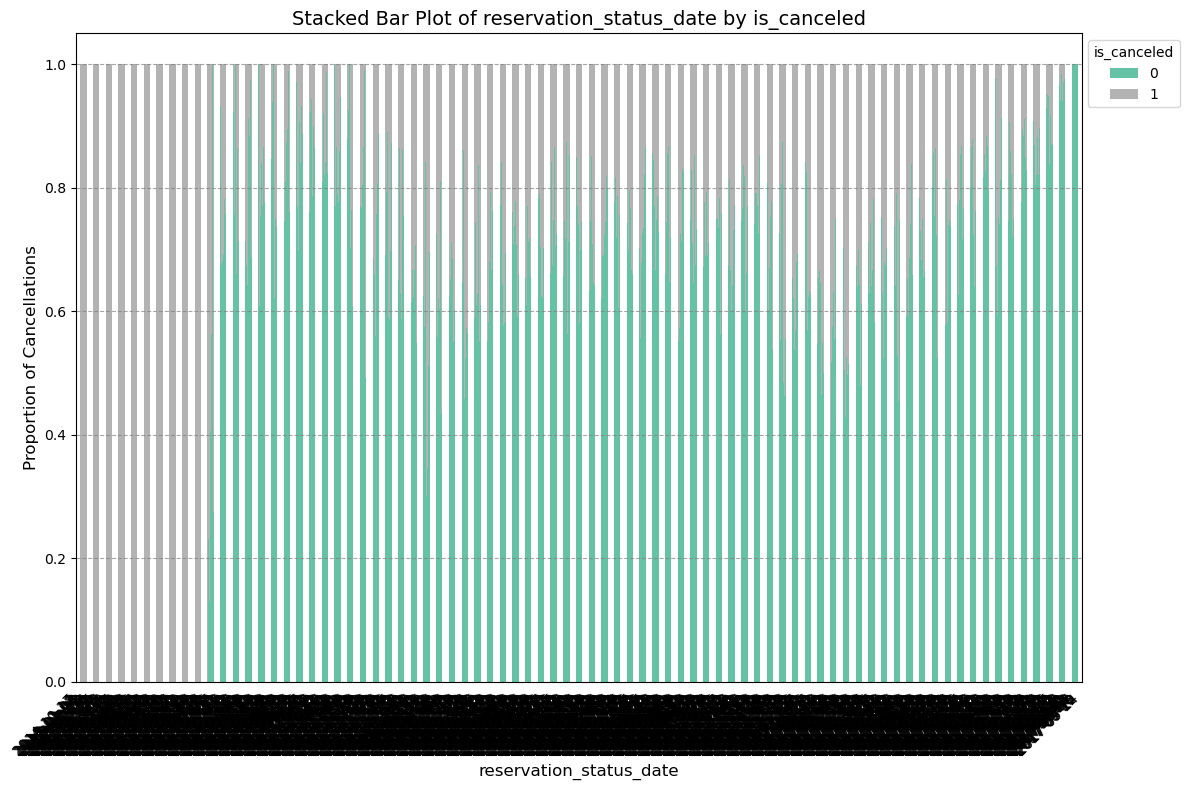

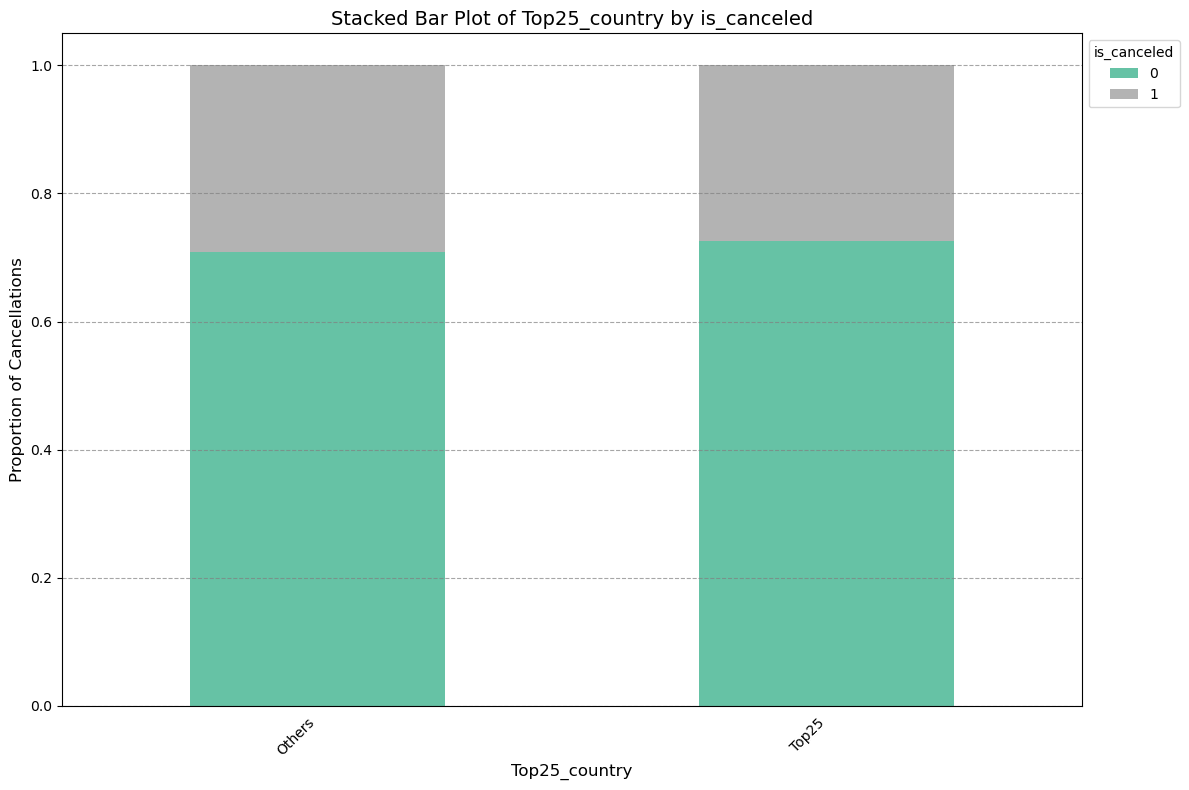

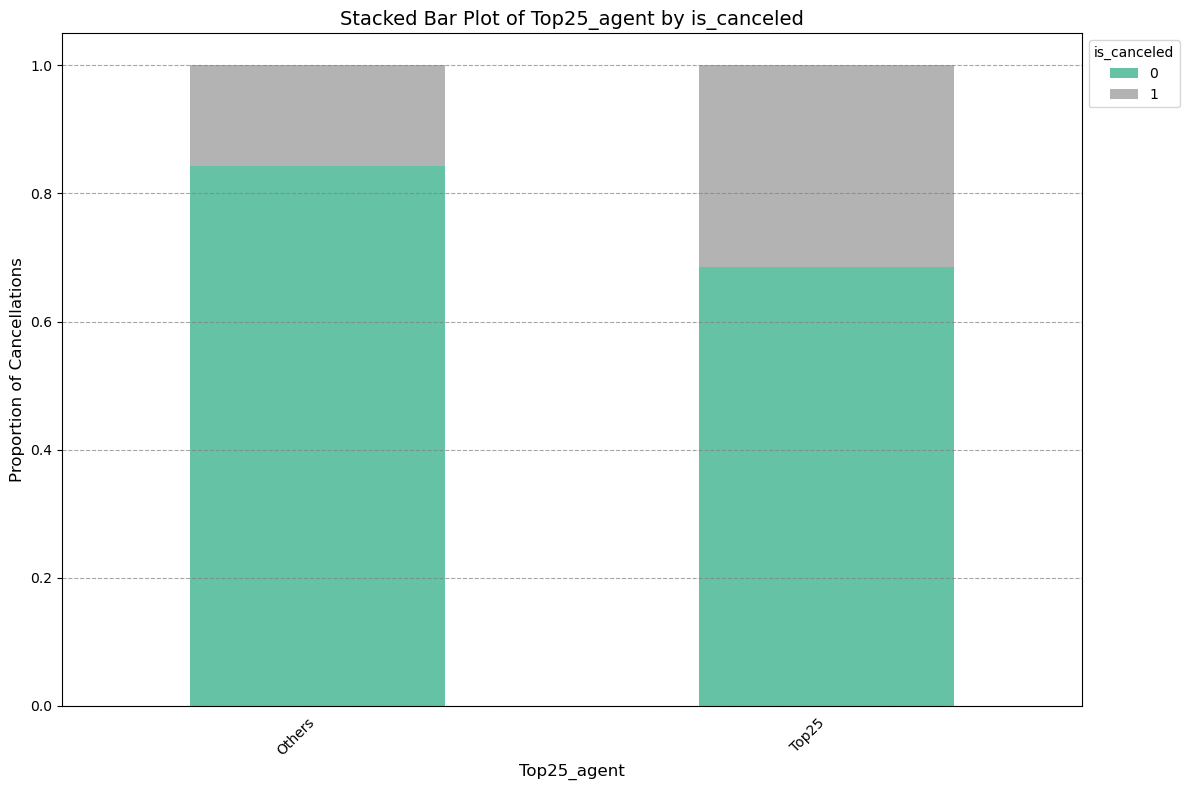

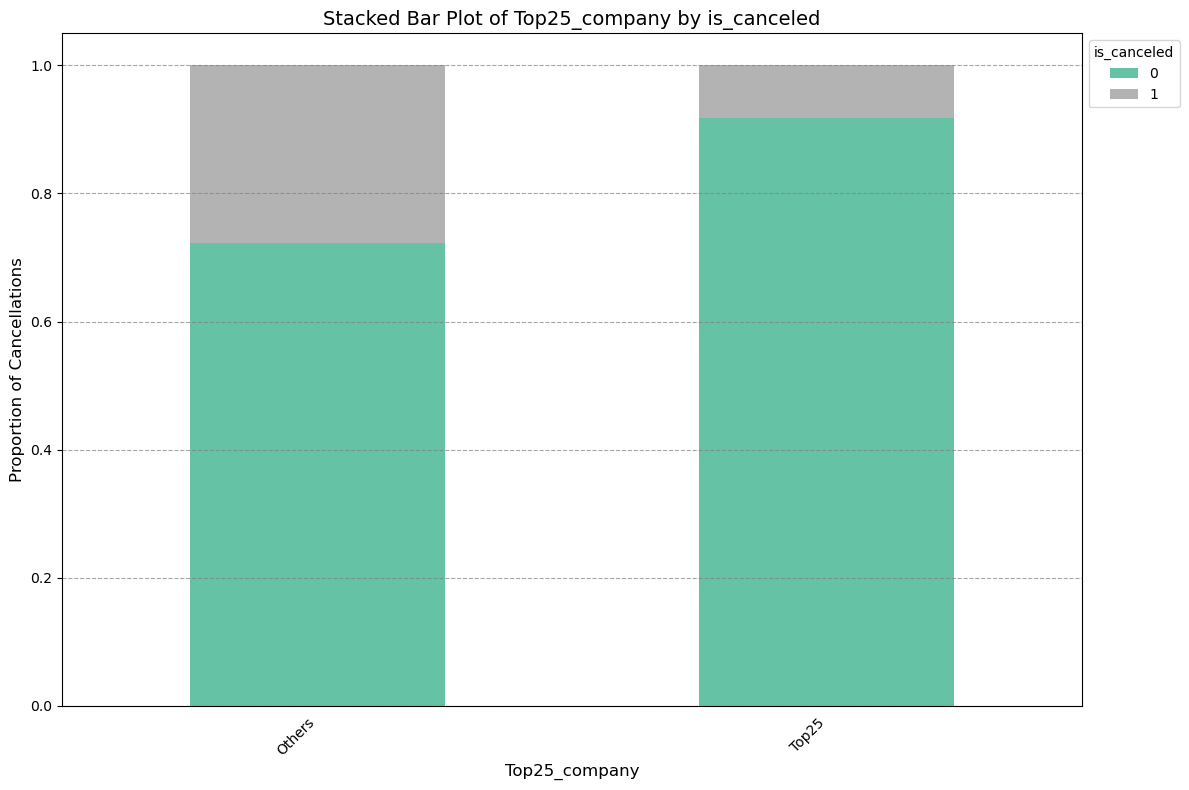

In [53]:
create_stacked_bar_plots(df, cat_cols)

2. Numirecal vs target

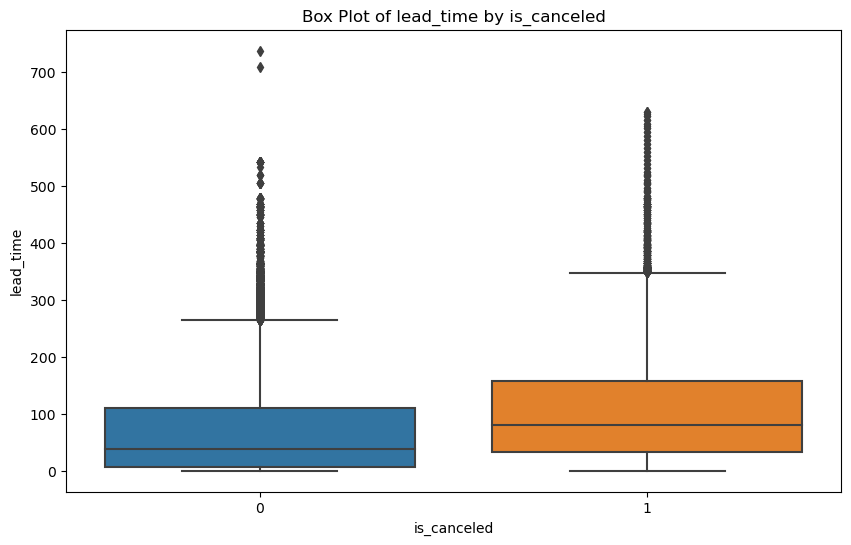

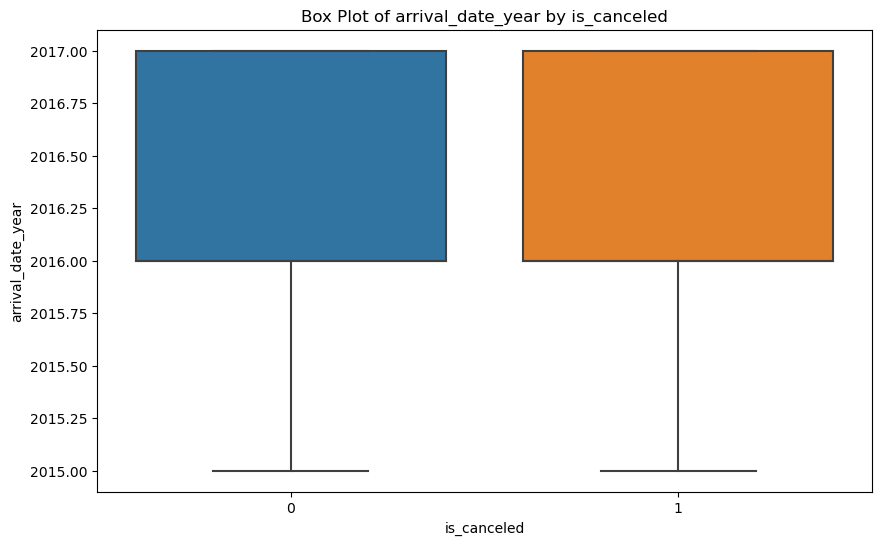

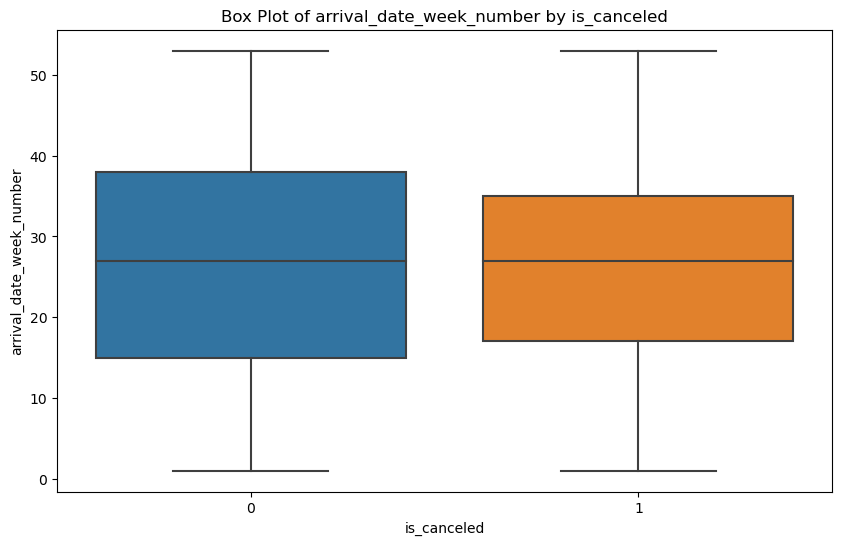

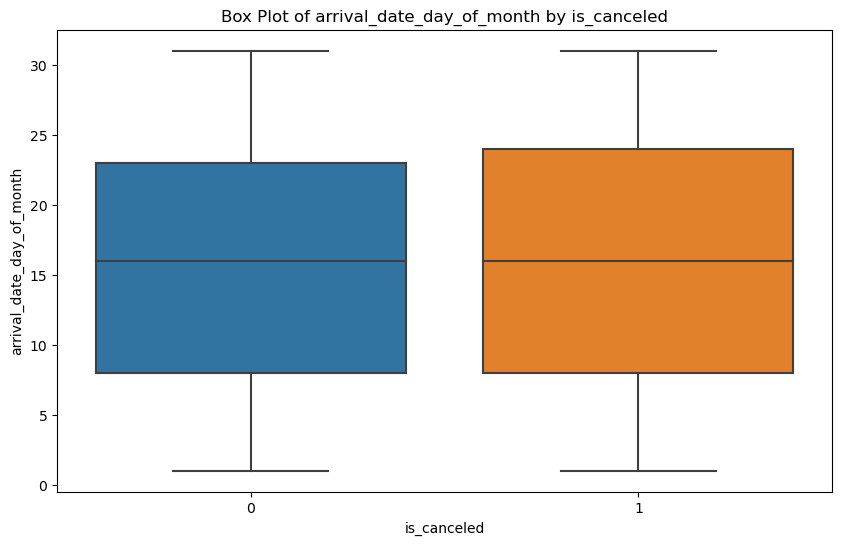

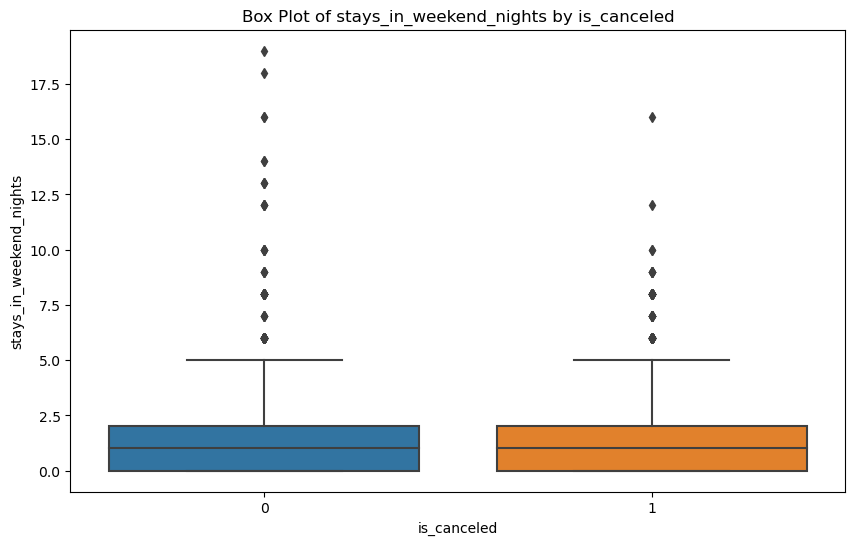

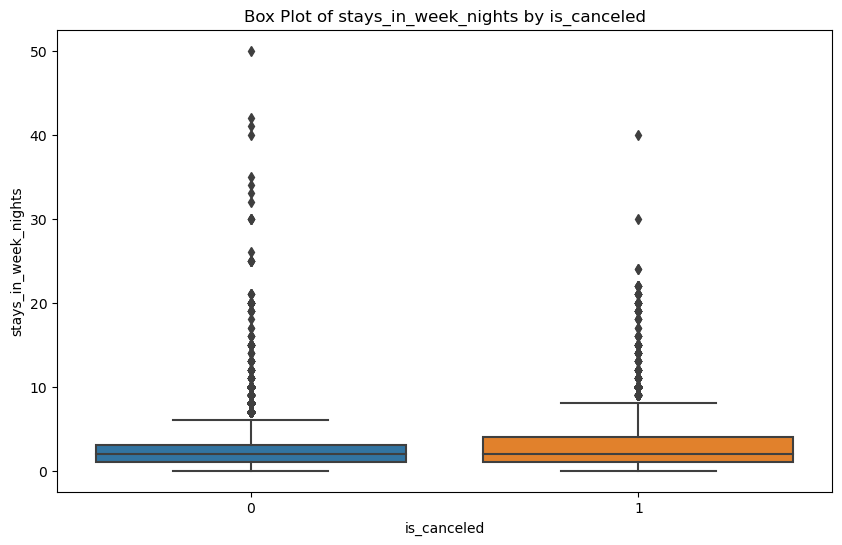

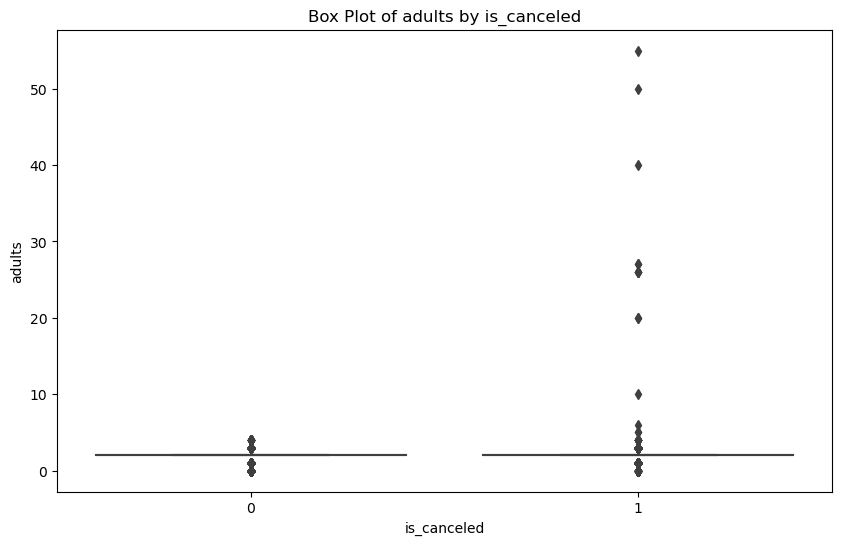

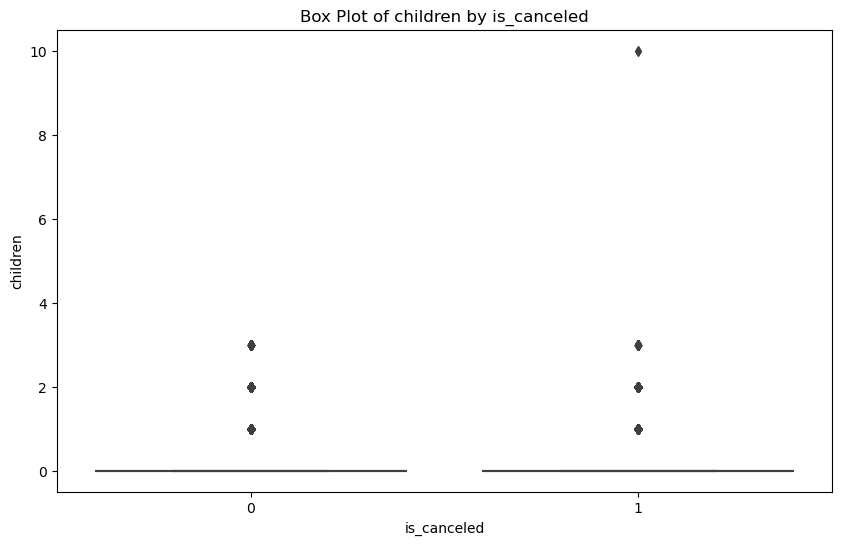

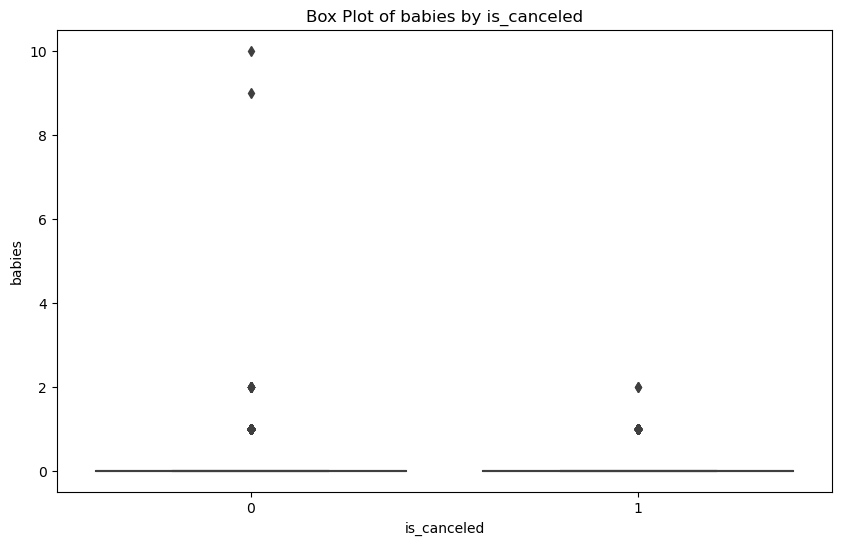

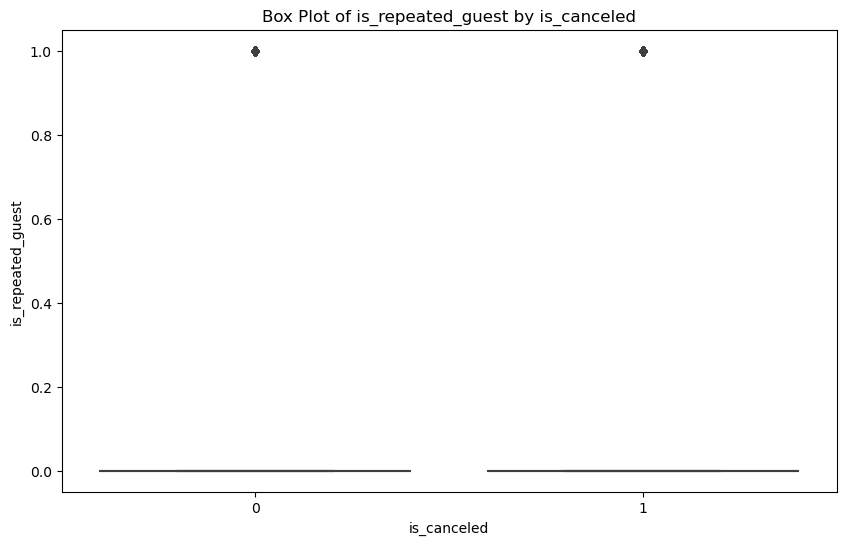

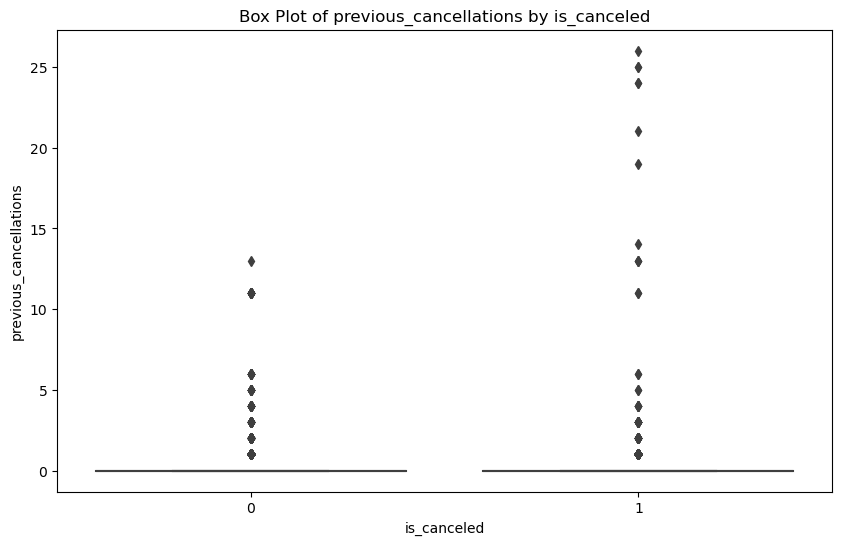

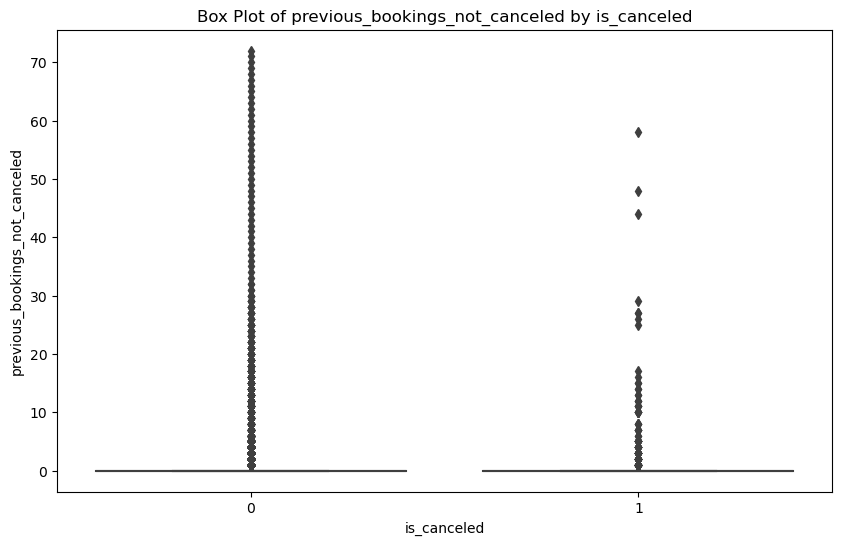

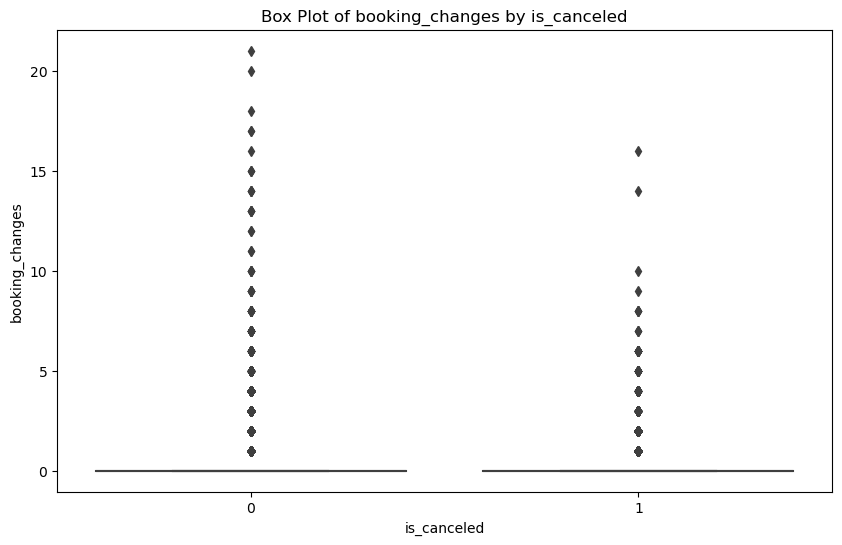

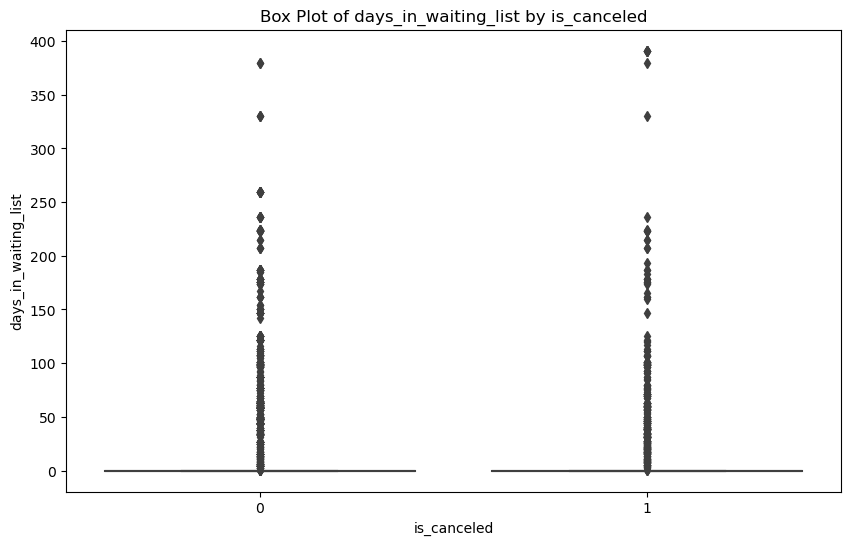

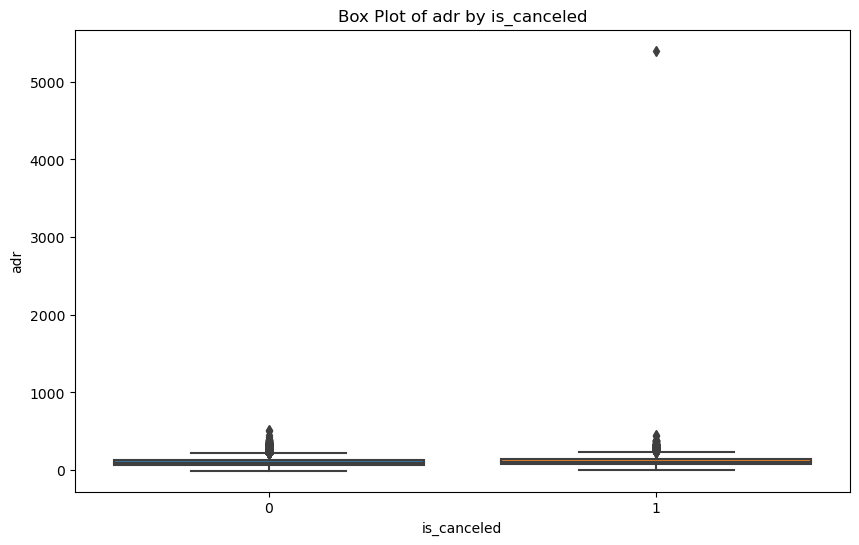

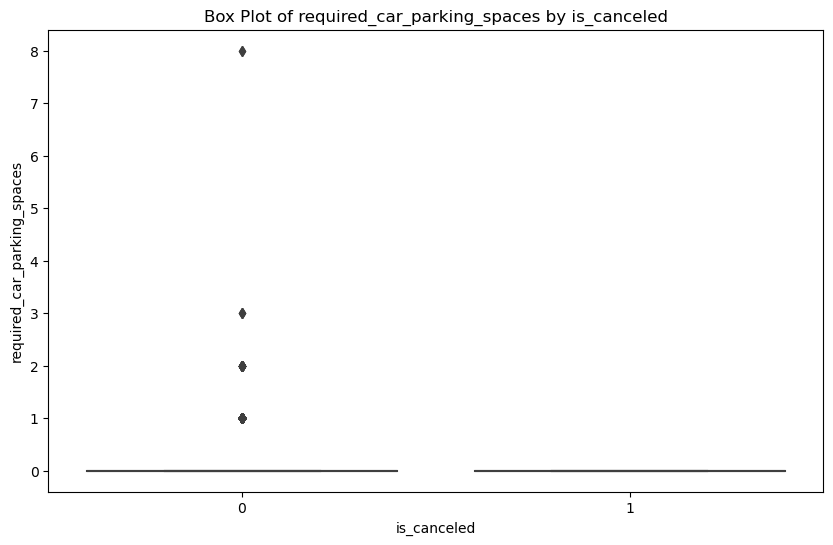

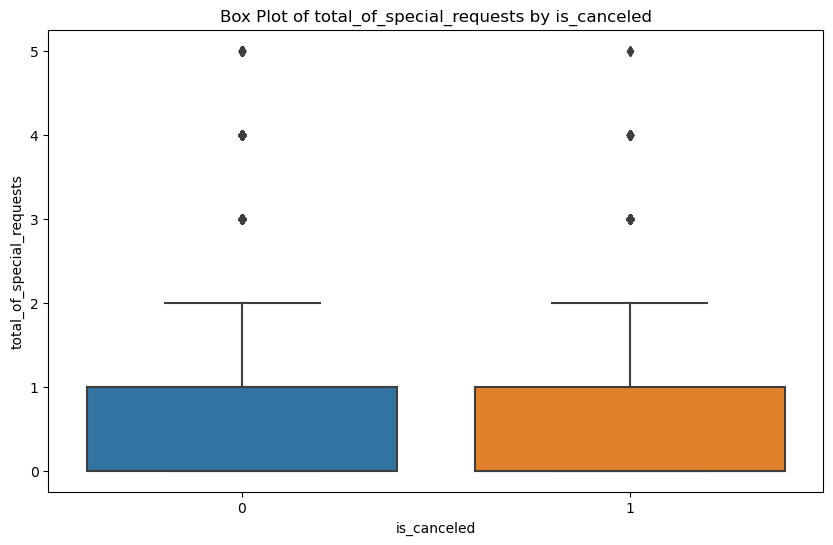

In [54]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    if col != 'is_canceled':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='is_canceled', y=col)
        plt.title(f'Box Plot of {col} by is_canceled')
        plt.show()

## Feature Enginering and Feature Selection

In [55]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(exclude='object').corr().corr().abs()

In [56]:
df.drop('reservation_status', axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Top25_country,Top25_agent,Top25_company
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,2015-07-01,Top25,Others,Others
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,2015-07-01,Top25,Others,Others
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Top25,Others,Others
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,2015-07-02,Top25,Others,Others
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,2015-07-03,Top25,Top25,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87387,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,Top25,Others,Others
87388,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,Top25,Top25,Others
87389,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,Top25,Top25,Others
87390,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,2017-09-07,Top25,Others,Others


Correlations with target variable:
lead_time                         0.184887
required_car_parking_spaces       0.184196
adr                               0.128103
total_of_special_requests         0.120604
booking_changes                   0.093622
is_repeated_guest                 0.089633
arrival_date_year                 0.088173
stays_in_week_nights              0.082948
adults                            0.081778
children                          0.067396
stays_in_weekend_nights           0.060214
previous_bookings_not_canceled    0.052149
previous_cancellations            0.051477
babies                            0.020537
arrival_date_day_of_month         0.005406
days_in_waiting_list              0.004470
arrival_date_week_number          0.001414
Name: is_canceled, dtype: float64


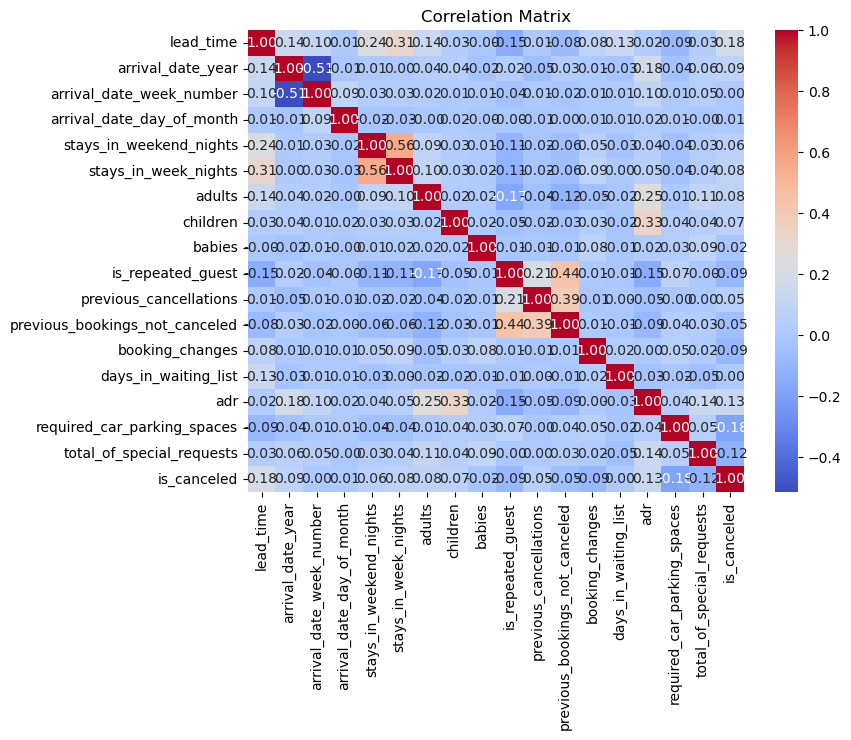

In [57]:
def calculate_and_plot_correlation(df, target_col):
  # Filter numeric columns (excluding the target variable)
  numeric_cols = [col for col in df.columns if df[col].dtype != object and col != target_col]

  # Create a DataFrame containing only numeric features and the target variable
  filtered_df = df[numeric_cols + [target_col]]

  # Calculate the correlation matrix
  correlation_matrix = filtered_df.corr()

  # Extract correlations with the target variable
  target_correlations = correlation_matrix[target_col].drop(target_col)

  # Sort correlations by absolute value
  target_correlations = target_correlations.abs().sort_values(ascending=False).T

  print("Correlations with target variable:")
  print(target_correlations)

  # Create a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Matrix')
  plt.show()



calculate_and_plot_correlation(df, 'is_canceled')


### Checking Normality

Jarque-Bera Test Hypothesis
Understanding the Test
The Jarque-Bera test is a statistical test used to determine if a sample data follows a normal distribution. It's based on the sample skewness and kurtosis.

Null Hypothesis (H0): The data is normally distributed.

Alternative Hypothesis (H1): The data is not normally distributed.

In [58]:
# checking for normality using jarque_bera
 
for i in df.select_dtypes(include=np.number):
    x=jarque_bera(df[i].dropna())
    if x[1]>0.05:
        print(i, '-->','pvalue',x[1], '----->','data  normally distributed')
    else:
        print(i, '-->', 'pvalue', x[1], 'data is not normally distributed')

is_canceled --> pvalue 0.0 data is not normally distributed
lead_time --> pvalue 0.0 data is not normally distributed
arrival_date_year --> pvalue 0.0 data is not normally distributed
arrival_date_week_number --> pvalue 0.0 data is not normally distributed
arrival_date_day_of_month --> pvalue 0.0 data is not normally distributed
stays_in_weekend_nights --> pvalue 0.0 data is not normally distributed
stays_in_week_nights --> pvalue 0.0 data is not normally distributed
adults --> pvalue 0.0 data is not normally distributed
children --> pvalue 0.0 data is not normally distributed
babies --> pvalue 0.0 data is not normally distributed
is_repeated_guest --> pvalue 0.0 data is not normally distributed
previous_cancellations --> pvalue 0.0 data is not normally distributed
previous_bookings_not_canceled --> pvalue 0.0 data is not normally distributed
booking_changes --> pvalue 0.0 data is not normally distributed
days_in_waiting_list --> pvalue 0.0 data is not normally distributed
adr --> pval

In [59]:
df_2=df[['previous_cancellations','days_in_waiting_list','booking_changes','previous_bookings_not_canceled','babies','children','adults',\
    'required_car_parking_spaces','stays_in_weekend_nights','stays_in_week_nights','arrival_date_day_of_month','arrival_date_week_number','total_of_special_requests']]
for col in df_2:
    print(df[col].value_counts(normalize=True))

previous_cancellations
0     0.980719
1     0.016100
2     0.001282
3     0.000698
4     0.000343
11    0.000309
5     0.000217
6     0.000195
13    0.000046
25    0.000023
24    0.000023
26    0.000011
14    0.000011
19    0.000011
21    0.000011
Name: proportion, dtype: float64
days_in_waiting_list
0      0.990159
63     0.000606
87     0.000286
44     0.000263
15     0.000252
         ...   
79     0.000011
120    0.000011
160    0.000011
85     0.000011
36     0.000011
Name: proportion, Length: 128, dtype: float64
booking_changes
0     0.818038
1     0.124748
2     0.040141
3     0.010012
4     0.004074
5     0.001327
6     0.000675
7     0.000355
8     0.000195
9     0.000092
10    0.000069
13    0.000057
14    0.000057
15    0.000034
16    0.000023
17    0.000023
12    0.000023
11    0.000023
20    0.000011
21    0.000011
18    0.000011
Name: proportion, dtype: float64
previous_bookings_not_canceled
0     0.959436
1     0.016958
2     0.006637
3     0.003788
4     0.002609
      

### previous_cancellations binning

Zero Cancellations: Since 0 is very frequent, it should be its own category.

Low Number of Cancellations: Group values from 1 to 4, as these are relatively sparse but still significant.

Medium Number of Cancellations: Group values from 5 to 11, as these are sparse but still present.

High Number of Cancellations: Combine values above 11, given their rarity.

Binning Ranges

**0**:      0 previous cancellations

**1-4**:    1, 2, 3, and 4 previous cancellations

**5-11**:   5, 6, 11 previous cancellations


In [60]:
df.loc[df.previous_cancellations.notnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.725135
1    0.274865
Name: proportion, dtype: float64

In [61]:
df.previous_cancellations.nunique()

15

In [62]:
pd.DataFrame(df.groupby("previous_cancellations")["is_canceled"].value_counts()).T

previous_cancellations     0            1        2       3       4      5      \
is_canceled                 0      1     1    0   0   1   0   1   0  1   0  1   
count                   62830  22877  1071  336  78  34  45  16  24  6  17  2   

previous_cancellations  6      11    13    14 19 21 24 25 26  
is_canceled              0  1   0  1  1  0  1  1  1  1  1  1  
count                   15  2  25  2  3  1  1  1  1  2  2  1

In [63]:
previous_cancellations_index = df.previous_cancellations.value_counts(normalize = True)[0:2].index
previous_cancellations_index

Index([0, 1], dtype='int64', name='previous_cancellations')

In [64]:
def prev_canc(x):
    if x in previous_cancellations_index:
        return("Yes")
    else:
        return("No")

In [65]:
df["previous_cancellations"]= df["previous_cancellations"].apply(prev_canc)

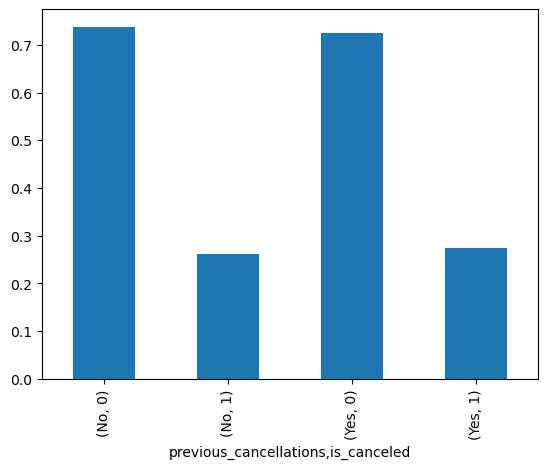

In [66]:
df.groupby("previous_cancellations")["is_canceled"].value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [67]:
tbl = pd.crosstab(df["previous_cancellations"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

0.6951417507177711

### Days in waiting list

In [68]:
# Define bin edges and labels
bins = [-1, 15, 60, 120, float('inf')]
labels = ['Short Waiting Time', 'Medium Waiting Time', 'Long Waiting Time', 'Very Long Waiting Time']

# Apply pd.cut to bin the data
df['waiting_list_binned'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=labels)

In [69]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('waiting_list_binned')['is_canceled'].mean()
correlations

waiting_list_binned
Short Waiting Time        0.274282
Medium Waiting Time       0.448171
Long Waiting Time         0.286275
Very Long Waiting Time    0.217391
Name: is_canceled, dtype: float64

In [70]:
# Define mapping based on proportions
mapping = {
'Short Waiting Time':        0.274282,
'Medium Waiting Time':       0.448171,
'Long Waiting Time':         0.286275,
'Very Long Waiting Time':    0.217391,
}


# Replace quarter_binned values with their encoded proportions
df['waiting_list_binned'] = df['waiting_list_binned'].map(mapping)

In [71]:
tbl = pd.crosstab(df["waiting_list_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

2.450205211403871e-11

### booking_changes

In [72]:
# Define bin edges and labels
bins = [-1, 2, float('inf')]
labels = ['Low Booking Changes', 'High Booking Changes']

# Apply pd.cut to bin the data
df['booking_changes_binned'] = pd.cut(df['booking_changes'], bins=bins, labels=labels)

In [73]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('booking_changes_binned')['is_canceled'].mean()
correlations

booking_changes_binned
Low Booking Changes     0.276822
High Booking Changes    0.162198
Name: is_canceled, dtype: float64

In [74]:
# Define mapping based on proportions
mapping = {
'Low Booking Changes':     0.276822,
'High Booking Changes':    0.162198,
}


# Replace quarter_binned values with their encoded proportions
df['booking_changes_binned'] = df['booking_changes_binned'].map(mapping)

In [75]:
tbl = pd.crosstab(df["booking_changes_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

1.0936524803361282e-22

### previous_bookings_not_canceled

In [76]:
df['previous_bookings_not_canceled'].value_counts(normalize=True)

previous_bookings_not_canceled
0     0.959436
1     0.016958
2     0.006637
3     0.003788
4     0.002609
        ...   
47    0.000011
49    0.000011
50    0.000011
51    0.000011
72    0.000011
Name: proportion, Length: 73, dtype: float64

In [77]:
# Check the range of data
print(df['previous_bookings_not_canceled'].min(), df['previous_bookings_not_canceled'].max())


0 72


In [78]:
# Define bin edges
bins = [-1, 0, float('inf')]

# Define bin labels
labels = ['No Previous Bookings', 'Previous Bookings']

# Apply pd.cut to bin the data
df['previous_bookings_not_canceled_binned'] = pd.cut(df['previous_bookings_not_canceled'], bins=bins, labels=labels,include_lowest=True)


In [79]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('previous_bookings_not_canceled_binned')['is_canceled'].mean()
correlations

previous_bookings_not_canceled_binned
No Previous Bookings    0.284375
Previous Bookings       0.049929
Name: is_canceled, dtype: float64

In [80]:
# Define mapping based on proportions
mapping = {
'No Previous Bookings':    0.284375,
'Previous Bookings':       0.049929,
}

# Create a new numerical column based on the mapping
df['previous_bookings_not_canceled_binned'] = df['previous_bookings_not_canceled_binned'].map(mapping)


In [81]:
 df['previous_bookings_not_canceled_binned']

0        0.284375
1        0.284375
2        0.284375
3        0.284375
4        0.284375
           ...   
87387    0.284375
87388    0.284375
87389    0.284375
87390    0.284375
87391    0.284375
Name: previous_bookings_not_canceled_binned, Length: 87392, dtype: category
Categories (2, float64): [0.284375 < 0.049929]

In [82]:
tbl = pd.crosstab(df["previous_bookings_not_canceled_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

9.965352048891973e-206

### stays_in_weekend_nights

In [83]:
df.loc[df.stays_in_weekend_nights.notnull(), "is_canceled"].value_counts(normalize = True)

is_canceled
0    0.725135
1    0.274865
Name: proportion, dtype: float64

In [84]:
df.stays_in_weekend_nights.nunique()

17

In [85]:
pd.DataFrame(df.groupby("stays_in_weekend_nights")["is_canceled"].value_counts()).T

stays_in_weekend_nights     0            1            2          3        \
is_canceled                  0     1      0     1      0     1    0    1   
count                    26468  8681  16445  6211  18339  8074  764  386   

stays_in_weekend_nights    4        5       6       7      8      9     10     \
is_canceled                 0    1   1   0   0   1   1  0   1   0  1  0  0  1   
count                    1212  522  36  34  57  56  11  4  34  26  6  4  5  2   

stays_in_weekend_nights 12    13 14 16    18 19  
is_canceled              0  1  0  0  0  1  0  0  
count                    4  1  3  2  2  1  1  1

In [86]:
significant_weekend_stays = df.stays_in_weekend_nights.value_counts(normalize = True)[0:19].index

In [87]:
def significant_weekend_stays(x):
    if x in [0, 2]:
        return "<2"
    elif x in range(2, 6):  # Check if x is in the range 2 to 5 inclusive
        return "2-5"
    else:
        return "Others"

In [88]:
df["significant_weekend_stay"]= df["stays_in_weekend_nights"].apply(significant_weekend_stays)

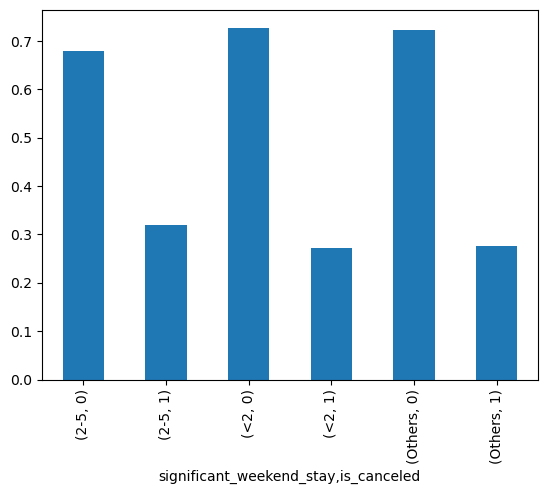

In [89]:
df.groupby("significant_weekend_stay")["is_canceled"].value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [90]:
tbl = pd.crosstab(df["significant_weekend_stay"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

1.057611987379172e-07

### stays_in_week_nights

In [91]:
week_bins = [0, 1, 4, 7, float('inf')]
week_labels = ['short', 'medium', 'Long','More than a week'] # Weekly, Fortnightly, Monthly...More than Month
df['week_stay_bins'] = pd.cut(df['stays_in_week_nights'], bins=week_bins, labels=week_labels,include_lowest=True)

In [92]:
df['week_stay_bins'].value_counts(normalize=True)

week_stay_bins
medium              0.513491
short               0.324572
Long                0.137404
More than a week    0.024533
Name: proportion, dtype: float64

In [93]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('week_stay_bins')['is_canceled'].mean()
correlations

week_stay_bins
short               0.214454
medium              0.298117
Long                0.319620
More than a week    0.336754
Name: is_canceled, dtype: float64

In [94]:
# Define the mapping
mapping = {
'short':               0.214454,
'medium':              0.298117,
'Long':                0.319620,
'More than a week':    0.336754,
}
# Replace bin labels with numerical values
df['week_stay_bins'] = df['week_stay_bins'].map(mapping)

In [95]:
tbl = pd.crosstab(df["week_stay_bins"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

9.839062308766132e-174

### arrival_date_day_of_month

In [96]:
# Define bins and labels for frequency-based binning
frequency_bins = [0, 10, 20, 31]
frequency_labels = ['High Frequency', 'Medium Frequency', 'Low Frequency']
df['day_freq_binned'] = pd.cut(df['arrival_date_day_of_month'], bins=frequency_bins, labels=frequency_labels, right=True)

In [97]:
df['day_freq_binned'].value_counts()

day_freq_binned
Low Frequency       30029
Medium Frequency    28984
High Frequency      28379
Name: count, dtype: int64

In [98]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('day_freq_binned')['is_canceled'].mean()
correlations

day_freq_binned
High Frequency      0.273336
Medium Frequency    0.270839
Low Frequency       0.280196
Name: is_canceled, dtype: float64

In [99]:
# Define mapping based on proportions
mapping = {
    'High Frequency': 0.273336,
'Medium Frequency': 0.270839,
'Low Frequency': 0.280196
}
# Replace quarter_binned values with their encoded proportions
df['day_freq_binned'] = df['day_freq_binned'].map(mapping)

In [100]:
tbl = pd.crosstab(df["day_freq_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

0.030634095754438845

### arrival_date_week_number

In [101]:
# Define bins and labels for quarterly binning
quarter_bins = [0, 13, 26, 39, 53]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

In [102]:
# Apply quarterly binning
df['quarter_binned'] = pd.cut(df['arrival_date_week_number'], bins=quarter_bins, labels=quarter_labels, right=True)

In [103]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('quarter_binned')['is_canceled'].mean()
correlations

quarter_binned
Q1    0.234448
Q2    0.298807
Q3    0.303150
Q4    0.239974
Name: is_canceled, dtype: float64

In [104]:
# Define mapping based on proportions
mapping = {
    'Q1': 0.234448,
    'Q2': 0.298807,
    'Q3': 0.303150,
    'Q4': 0.239974
}
# Replace quarter_binned values with their encoded proportions
df['quarter_binned'] = df['quarter_binned'].map(mapping)

In [105]:
tbl = pd.crosstab(df["quarter_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

3.740123090031101e-94

### total_of_special_requests

In [106]:
# Define bin edges and labels
bins = [-1, 1, float('inf')]
labels = ['Low Requests', 'High Requests']

# Apply pd.cut to bin the data
df['requests_binned'] = pd.cut(df['total_of_special_requests'], bins=bins, labels=labels)

In [107]:
# Calculate the correlation between each bin and is_canceled
correlations = df.groupby('requests_binned')['is_canceled'].mean()
correlations

requests_binned
Low Requests     0.289049
High Requests    0.203466
Name: is_canceled, dtype: float64

In [108]:
# Define mapping based on proportions
mapping = {
'Low Requests':     0.289049,
'High Requests':    0.203466,
}


# Replace quarter_binned values with their encoded proportions
df['requests_binned'] = df['requests_binned'].map(mapping)

In [109]:
tbl = pd.crosstab(df["requests_binned"], df["is_canceled"])

teststats, pvalue, dof, exp = stats.chi2_contingency(tbl)
pvalue

1.7636846932241415e-98

### Checking significance of categorical variables

In [110]:
df=df.drop(['arrival_date_year','days_in_waiting_list','previous_bookings_not_canceled','previous_cancellations','is_repeated_guest','babies','reservation_status'],axis=1)


In [111]:
categorical_features=df.select_dtypes('object').columns
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['is_canceled'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}:")
    print(f"  Chi2 statistic: {chi2}")
    print(f"  p-value: {p}")
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print(contingency_table)
    if p < 0.05:
        print("  Significant association with 'is_canceled'")
    else:
        print("  No significant association with 'is_canceled'")
    print("--------------------------------------")
    print()

Chi-square test for hotel:
  Chi2 statistic: 446.9689176080617
  p-value: 3.2943359239611633e-99
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
is_canceled       0      1
hotel                     
City Hotel    37379  16045
Resort Hotel  25992   7976
  Significant association with 'is_canceled'
--------------------------------------

Chi-square test for arrival_date_month:
  Chi2 statistic: 639.7206549973853
  p-value: 4.426123365183816e-130
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
is_canceled            0     1
arrival_date_month            
April               5499  2409
August              7634  3619
December            3753  1378
February            4683  1415
January             3655  1038
July                6859  3198
June                5411  2354
March               5683  1830
May                 5913  2442
November            3941  1054
October             5292  1642
September           5048  1642
  Significant association with 'is_canceled'
--------------------------------------

Chi-squ

### Encoding Categorical data

In [112]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [113]:
df_categorical=df.select_dtypes(include='object')

for col in df_categorical:
    print(df[col].nunique(),f'<<-----------{col}')

2 <<-----------hotel
12 <<-----------arrival_date_month
5 <<-----------meal
7 <<-----------market_segment
5 <<-----------distribution_channel
10 <<-----------reserved_room_type
12 <<-----------assigned_room_type
3 <<-----------deposit_type
4 <<-----------customer_type
926 <<-----------reservation_status_date
2 <<-----------Top25_country
2 <<-----------Top25_agent
2 <<-----------Top25_company
3 <<-----------significant_weekend_stay


In [114]:
df=df.drop('reservation_status_date',axis=1)

In [115]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_encoded_categorical=pd.DataFrame()

for col in df_categorical:
    df_encoded_categorical[col] = encoder.fit_transform(df_categorical[col])

df_encoded_categorical

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date,Top25_country,Top25_agent,Top25_company,significant_weekend_stay
0,1,5,0,3,1,2,2,0,2,121,1,0,0,1
1,1,5,0,3,1,2,2,0,2,121,1,0,0,1
2,1,5,0,3,1,0,2,0,2,122,1,0,0,1
3,1,5,0,2,0,0,0,0,2,122,1,0,0,1
4,1,5,0,6,3,0,0,0,2,123,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87387,0,1,0,5,3,0,0,0,2,919,1,0,0,1
87388,0,1,0,6,3,4,4,0,2,920,1,1,0,1
87389,0,1,0,6,3,3,3,0,2,920,1,1,0,1
87390,0,1,0,6,3,0,0,0,2,920,1,0,0,1


In [116]:
df_numerical=df_numerical.reset_index(drop=True)
df_encoded_categorical=df_encoded_categorical.reset_index(drop=True)

In [117]:
encoded_combined_df=pd.concat([df_numerical,df_encoded_categorical],axis=1)
encoded_combined_df


,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,waiting_list_binned,booking_changes_binned,previous_bookings_not_canceled_binned,week_stay_bins,day_freq_binned,quarter_binned,requests_binned,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date,Top25_country,Top25_agent,Top25_company,significant_weekend_stay
0,0,342,27,1,0,0,2,0.0,3,0.00,0,0,0.274282,0.162198,0.284375,0.214454,0.273336,0.30315,0.289049,1,5,0,3,1,2,2,0,2,121,1,0,0,1
1,0,737,27,1,0,0,2,0.0,4,0.00,0,0,0.274282,0.162198,0.284375,0.214454,0.273336,0.30315,0.289049,1,5,0,3,1,2,2,0,2,121,1,0,0,1
2,0,7,27,1,0,1,1,0.0,0,75.00,0,0,0.274282,0.276822,0.284375,0.214454,0.273336,0.30315,0.289049,1,5,0,3,1,0,2,0,2,122,1,0,0,1
3,0,13,27,1,0,1,1,0.0,0,75.00,0,0,0.274282,0.276822,0.284375,0.214454,0.273336,0.30315,0.289049,1,5,0,2,0,0,0,0,2,122,1,0,0,1
4,0,14,27,1,0,2,2,0.0,0,98.00,0,1,0.274282,0.276822,0.284375,0.298117,0.273336,0.30315,0.289049,1,5,0,6,3,0,0,0,2,123,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87387,0,23,35,30,2,5,2,0.0,0,96.14,0,0,0.274282,0.276822,0.284375,0.319620,0.280196,0.30315,0.289049,0,1,0,5,3,0,0,0,2,919,1,0,0,1
87388,0,102,35,31,2,5,3,0.0,0,225.43,0,2,0.274282,0.276822,0.284375,0.319620,0.280196,0.30315,0.203466,0,1,0,6,3,4,4,0,2,920,1,1,0,1
87389,0,34,35,31,2,5,2,0.0,0,157.71,0,4,0.274282,0.276822,0.284375,0.319620,0.280196,0.30315,0.203466,0,1,0,6,3,3,3,0,2,920,1,1,0,1
87390,0,109,35,31,2,5,2,0.0,0,104.40,0,0,0.274282,0.276822,0.284375,0.319620,0.280196,0.30315,0.289049,0,1,0,6,3,0,0,0,2,920,1,0,0,1


### Splitting the data

In [118]:
X = encoded_combined_df.drop(["is_canceled"], axis=1)
y = encoded_combined_df["is_canceled"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

## Losgistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
yt_pred = lr.predict(X_train)
ypred = lr.predict(X_test)

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_train,yt_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     44267
           1       0.67      0.29      0.40     16907

    accuracy                           0.76     61174
   macro avg       0.72      0.62      0.63     61174
weighted avg       0.75      0.76      0.73     61174



In [122]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19104
           1       0.64      0.28      0.39      7114

    accuracy                           0.76     26218
   macro avg       0.71      0.61      0.62     26218
weighted avg       0.74      0.76      0.73     26218



In [123]:
print(accuracy_score(y_train,yt_pred))

0.7632981331938405


In [124]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


## Decision Tree

In [125]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)


In [126]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
# Predict on the test set
y_pred = model.predict(X_test)
yt_pred = model.predict(X_train)

In [128]:
print(classification_report(y_train,yt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44267
           1       1.00      1.00      1.00     16907

    accuracy                           1.00     61174
   macro avg       1.00      1.00      1.00     61174
weighted avg       1.00      1.00      1.00     61174



In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     19104
           1       0.81      0.82      0.82      7114

    accuracy                           0.90     26218
   macro avg       0.87      0.88      0.87     26218
weighted avg       0.90      0.90      0.90     26218



In [130]:
print(accuracy_score(y_train,yt_pred))

1.0


In [131]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


In [132]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
27,reservation_status_date,0.293029
1,arrival_date_week_number,0.148899
0,lead_time,0.099922
10,total_of_special_requests,0.064162
21,market_segment,0.048782
8,adr,0.048282
19,arrival_date_month,0.044622
2,arrival_date_day_of_month,0.043420
16,quarter_binned,0.035816
25,deposit_type,0.035537


In [133]:
# Feature importances
feature_importances = model.feature_importances_

feature_importances

array([9.99220518e-02, 1.48899393e-01, 4.34201401e-02, 7.27295610e-03,
       1.66701698e-02, 6.31792491e-03, 2.82641704e-03, 6.13776358e-03,
       4.82818103e-02, 2.80209164e-02, 6.41616115e-02, 2.45683432e-04,
       2.98595930e-04, 1.17394592e-03, 6.09697980e-03, 6.13901968e-03,
       3.58163669e-02, 1.25949453e-03, 3.64933927e-03, 4.46216714e-02,
       4.86069263e-03, 4.87819040e-02, 1.84131709e-03, 6.11853582e-03,
       1.03893621e-02, 3.55365399e-02, 1.37160065e-02, 2.93029350e-01,
       3.33297129e-03, 6.06750036e-03, 4.75144432e-04, 4.61842543e-03])

## Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [135]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
yt_pred = model.predict(X_train)



In [136]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 reservation_status_date                  0.206685
lead_time                                0.129080
adr                                      0.088940
arrival_date_week_number                 0.064162
arrival_date_day_of_month                0.057897
total_of_special_requests                0.047924
market_segment                           0.047477
arrival_date_month                       0.035433
stays_in_week_nights                     0.032158
required_car_parking_spaces              0.028008
assigned_room_type                       0.023010
deposit_type                             0.022733
stays_in_weekend_nights                  0.019564
quarter_binned                           0.018768
customer_type                            0.018028
reserved_room_type                       0.017174
day_freq_binned                          0.016346
booking_changes                          0.016012
week_stay_bins                           0.013894
adults                      

In [137]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_train, yt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, yt_pred))
print("Classification Report:\n", classification_report(y_train, yt_pred))

Accuracy: 1.0
Confusion Matrix:
 [[44267     0]
 [    0 16907]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44267
           1       1.00      1.00      1.00     16907

    accuracy                           1.00     61174
   macro avg       1.00      1.00      1.00     61174
weighted avg       1.00      1.00      1.00     61174



In [138]:
# Evaluate the model 'test'
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8899992371653063
Confusion Matrix:
 [[18549   555]
 [ 2329  4785]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     19104
           1       0.90      0.67      0.77      7114

    accuracy                           0.89     26218
   macro avg       0.89      0.82      0.85     26218
weighted avg       0.89      0.89      0.88     26218



In [139]:
print(accuracy_score(y_train,yt_pred))

1.0


In [140]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


## BalancedRandomForestClassifier

In [1]:

from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [141]:

# Make predictions on the testing set
y_pred = model.predict(X_test)
yt_pred=model.predict(X_train)
# Evaluate the model on the training set
print("Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, yt_pred))
print("Classification Report:")
print(classification_report(y_train, yt_pred))
print
# Evaluate the model on the training set
print("Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print

Training Set Evaluation
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44267
           1       1.00      1.00      1.00     16907

    accuracy                           1.00     61174
   macro avg       1.00      1.00      1.00     61174
weighted avg       1.00      1.00      1.00     61174

Test Set Evaluation
Accuracy: 0.8899992371653063
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19104
           1       0.90      0.67      0.77      7114

    accuracy                           0.89     26218
   macro avg       0.89      0.82      0.85     26218
weighted avg       0.89      0.89      0.88     26218



<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [142]:
print(accuracy_score(y_train,yt_pred))

1.0


In [143]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


## Gradient Boost

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

print("GBM Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

GBM Accuracy:  0.8411015332977344
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     19104
           1       0.81      0.54      0.65      7114

    accuracy                           0.84     26218
   macro avg       0.83      0.75      0.77     26218
weighted avg       0.84      0.84      0.83     26218



In [145]:
yt_pred = gbm.predict(X_train)
print("GBM Accuracy: ", accuracy_score(y_train, yt_pred))
print(classification_report(y_train, yt_pred))

GBM Accuracy:  0.8441821688952823
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     44267
           1       0.83      0.55      0.66     16907

    accuracy                           0.84     61174
   macro avg       0.84      0.75      0.78     61174
weighted avg       0.84      0.84      0.83     61174



In [146]:
print(accuracy_score(y_train,yt_pred))

0.8441821688952823


In [147]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


## XGBoost

In [148]:
encoded_combined_df = encoded_combined_df.astype(float)

In [149]:
X = encoded_combined_df.drop(["is_canceled"], axis=1)
y = encoded_combined_df["is_canceled"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy:  0.9631550842932337
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98     19104
         1.0       0.99      0.87      0.93      7114

    accuracy                           0.96     26218
   macro avg       0.97      0.93      0.95     26218
weighted avg       0.96      0.96      0.96     26218



In [152]:
yt_pred = xgb_model.predict(X_train)
print("XGBoost Accuracy: ", accuracy_score(y_train, yt_pred))
print(classification_report(y_train, yt_pred))

XGBoost Accuracy:  0.9693824173668552
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     44267
         1.0       1.00      0.89      0.94     16907

    accuracy                           0.97     61174
   macro avg       0.98      0.95      0.96     61174
weighted avg       0.97      0.97      0.97     61174



In [153]:
print(accuracy_score(y_train,yt_pred))

0.9693824173668552


In [154]:
print(accuracy_score(y_test,ypred))

0.7619192920894042


## SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("SVC Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
yt_pred = svc.predict(X_train)
print("XGBoost Accuracy: ", accuracy_score(y_train, yt_pred))
print(classification_report(y_train, yt_pred))